
# Student Dropout & Success Prediction Dataset
**Course: CS6330 Data Science**


Team:

*   Jane Ha
*   Alinsandra Lorn
*   Aaron Alacar

Date: May 2nd 2025



## 1.0 Project Introduction

This project analyzes and predicts student outcomes — specifically whether a student will Dropout, Enroll, or Graduate — based on academic performance, demographic, and socioeconomic data.

**Goal:**  
Build a predictive model that helps identify students at risk of dropping out early, using academic and background data.

**Dataset:**  
We use the *"Predict Students Dropout and Academic Success"* dataset from a Portuguese higher education institution. It contains 4424 records and 37 features, including grades, course enrollment, parental education, unemployment, and more.

This dataset enables both descriptive analysis and supervised learning to support education policy and interventions.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preparation


In [ ]:
import os
os.listdir('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025')


from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')

df_clean = df.copy()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Ensure target is mapped correctly to human-readable labels
df['target_label'] = df['target'].map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')


# Progress Report #1



##1.1 Data Wrangling

The "Predict Students' Dropout and Academic Success" dataset has undergone preliminary data wrangling (e.g., cleaning, structuring) prior to this analysis. Below, we assess its current state to guide further processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os


path = '/content/drive/MyDrive'

# List all folders/files in that path
for folder in os.listdir(path):
    print(folder)


Air Force Comm. - Pie chart 3.gsheet
3 min radio show - script grading file.doc
Ram Radio 07.17 _ Music Master Training #1 .MOV
RamRadio Music Master Training #2 07.19 .MOV
.RamRadio Music Master Training #3 07.19 .MOV
IMG_0858.MOV
IMG_0857.MOV
Vid pro - 1st assignment
participant.aspx
EBSCO
PR Presentation.gdoc
HTM 1025 Final.mp4
htm final.mp4
vllo (1).mov
vllo.mov
Ram Relations with Rema _ final 11.07.mp4
RAM RELATIONS 11.10 FINAL.mp4
Intro to PR _ After Exam.gdoc
Rack Focus.MOV
Hip Level Shot.MOV
Low Angle Shot.MOV
Ground Level Shot.MOV
Birds-Eye-View Shot.MOV
Shoulder Level Shot.MOV
High Angle Shot.MOV
MVI_0390.MOV
Focus Pull.MOV
Dutch Angle Shot.MOV
Eye Level Shot.MOV
Tilt Shift.MOV
Knee Level Shot.MOV
Split Diopter.MOV
Kpop concert teaser 2 .mp4
kpop.mp4
Intro to Public Relations _ After Quiz #1.gdoc
PR Everything Finals.gdoc
Meeting notes.gdoc
CS 6330 Data Science Team 12 Spring 2025
students_dropout_academic_success (1).csv
students_dropout_academic_success.csv
Colab Notebooks


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')


In [ ]:
print('Dataset shape:', df.shape)
df.info()

Dataset shape: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualif

From this we can see that the dataset contains 4424 rows and 37 columns, the different data types, and that there are no missing values.

In [ ]:
status = df.groupby('target').size()

print(status)
print()
print(f'Dropout: {1421 / 4424 * 100:.2f}%')
print(f'Enrolled: {794 / 4424 * 100:.2f}%')
print(f'Graduate: {2209/ 4424 * 100:.2f}%')

target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64

Dropout: 32.12%
Enrolled: 17.95%
Graduate: 49.93%


In [ ]:
# Check for outliers in key columns
print("\nChecking for outliers in key columns:")
key_numeric_cols = ['Age at enrollment', 'Previous qualification (grade)', 'Admission grade',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

for col in key_numeric_cols:
    D1 = df[col].quantile(0.25)
    D3 = df[col].quantile(0.75)
    IQR = D3 - D1
    lower_bound = D1 - 1.5 * IQR
    upper_bound = D3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_pct = outliers_count / len(df) * 100
    print(f"{col}: {outliers_count} outliers ({outlier_pct:.2f}%)")


Checking for outliers in key columns:
Age at enrollment: 441 outliers (9.97%)
Previous qualification (grade): 179 outliers (4.05%)
Admission grade: 86 outliers (1.94%)
Curricular units 1st sem (grade): 726 outliers (16.41%)
Curricular units 2nd sem (grade): 877 outliers (19.82%)


## Feature Engineering
- Approval rate, overall grade average, grade change



In [ ]:
# Feature engineering: approval rate, grade average, grade change
df['approval_rate_1st'] = df['Curricular units 1st sem (approved)'] / df['Curricular units 1st sem (enrolled)']
df['approval_rate_2nd'] = df['Curricular units 2nd sem (approved)'] / df['Curricular units 2nd sem (enrolled)']
df['overall_grade_avg'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2
df['grade_change'] = df['Curricular units 2nd sem (grade)'] - df['Curricular units 1st sem (grade)']


# #2.0 Data Exploration


This is an exploration output of statistical categorical variables.

In [ ]:
# Display of categorical and numerical summaries
num_summary = df.select_dtypes(include=['int64', 'float64']).describe().T
display(num_summary)

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.000000,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.000000,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.000000,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.000000,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.000000,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.000000,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.000000,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.000000,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.000000,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.000000,3.00,19.000000,37.000000,44.000000


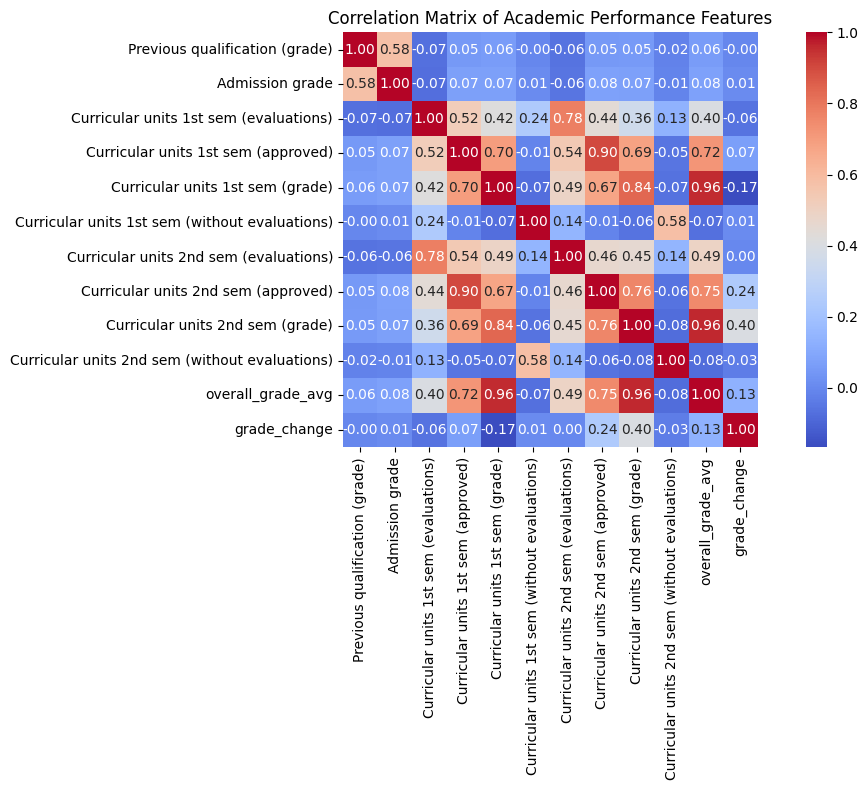

In [ ]:
#Correlation Heatmap for Academic Performance
# Focus on academic performance columns
performance_cols = [col for col in df.columns if 'grade' in col or 'approved' in col or 'evaluations' in col]
correlation_matrix = df[performance_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Academic Performance Features")
plt.tight_layout()
plt.show()


# 1.2 Data Exploration – Visualizing Key Features

This section examines key academic and demographic features to identify patterns associated with student dropout, enrollment, and graduation. We focus on distributions, categorical breakdowns, and correlations to guide feature selection for later modeling.


### 1.2.1 Target Outcome Distribution

We start by examining the distribution of the target variable to understand how students are categorized: Dropout, Enrolled, or Graduate. This initial overview reveals potential class imbalance which could impact model performance.

Unique values in target: ['Dropout' 'Graduate' 'Enrolled']


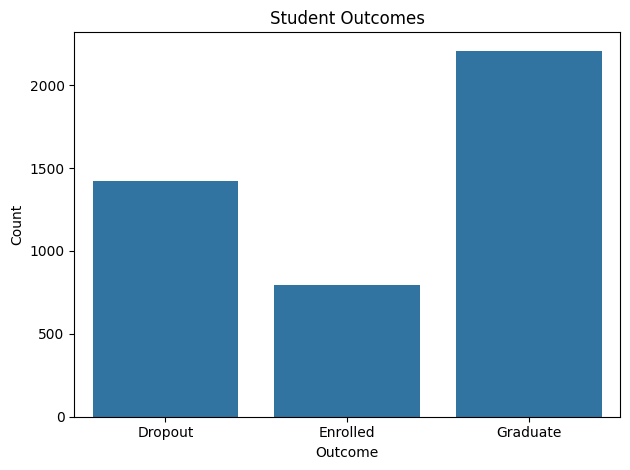

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check what values are actually in 'target'
print("Unique values in target:", df['target'].unique())

# Create 'target_label' based on what’s in 'target'
if df['target'].dtype == 'O' or df['target'].dropna().astype(str).str.contains('Dropout|Graduate|Enrolled').any():
    # Already labeled
    df['target_label'] = df['target']
else:
    # Numeric values → map them
    df['target_label'] = df['target'].map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})

# Drop any rows where 'target_label' is missing (just in case)
df_plot = df.dropna(subset=['target_label'])

# Plot
sns.countplot(data=df_plot, x='target_label', order=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



The chart indicates that the majority of students are Graduates, followed by Dropouts. Enrolled students form the smallest group, which introduces class imbalance—a factor to consider in classification models.

### 2.2 Categorical Value Counts

Next, we explore the distribution of categorical variables such as Gender, Marital Status, and Scholarship Holder. Identifying dominant categories helps with encoding decisions and informs our understanding of the dataset's structure.

In [ ]:
# Value counts for all categorical (object) columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)



Value counts for target:

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
----------------------------------------
Value counts for target_label:

target_label
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
----------------------------------------


These counts highlight skewed distributions in some features, like a higher number of single students or male/female imbalances. This informs preprocessing decisions, such as merging rare categories or applying one-hot encoding.

In [ ]:
#Table 6.1.3
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target,approval_rate_1st,approval_rate_2nd,overall_grade_avg,grade_change,target_label
0,1,17,5,171,1,1,122.0,1,19,12,...,0,10.8,1.4,1.74,Dropout,NaN,NaN,0.000000,0.000000,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,13.9,-0.3,0.79,Graduate,1.000000,1.000000,13.833333,-0.333333,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,10.8,1.4,1.74,Dropout,0.000000,0.000000,0.000000,0.000000,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,9.4,-0.8,-3.12,Graduate,1.000000,0.833333,12.914286,-1.028571,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,13.9,-0.3,0.79,Graduate,0.833333,1.000000,12.666667,0.666667,Graduate


These distributions help identify any dominant categories or imbalances in the student population, which may affect model bias or interpretation.


### 2.3 Correlation with Target
To understand which features are most strongly associated with student outcomes, we compute correlations between all features and the target variable. Since correlation only works with numeric data, we convert categorical features into numeric format using one-hot encoding.


In [ ]:
# Convert 'target' to numeric if needed
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['target'] = df['target'].map(target_map)

# Encode other features and reattach target
target = df['target']
df_encoded = pd.get_dummies(df.drop(columns='target'), drop_first=True)
df_encoded['target'] = target

# Compute correlations
cor_target = df_encoded.corr()['target'].sort_values(ascending=False)

# Display top and bottom correlated features
print(" Top 10 positive correlations with target:\n")
print(cor_target.head(10))

print("\n Top 10 negative correlations with target:\n")
print(cor_target.tail(10))


 Top 10 positive correlations with target:

target                                 1.000000
target_label_Graduate                  0.924138
approval_rate_2nd                      0.748459
approval_rate_1st                      0.678807
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
overall_grade_avg                      0.550356
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Name: target, dtype: float64

 Top 10 negative correlations with target:

Mother's qualification                           -0.043178
Previous qualification                           -0.056039
Curricular units 1st sem (without evaluations)   -0.068702
Marital Status                                   -0.089804
target_label_Enrolled                            -0.093796
Curricular units 2nd sem (without evaluations)   -0.094028
Application mode                                

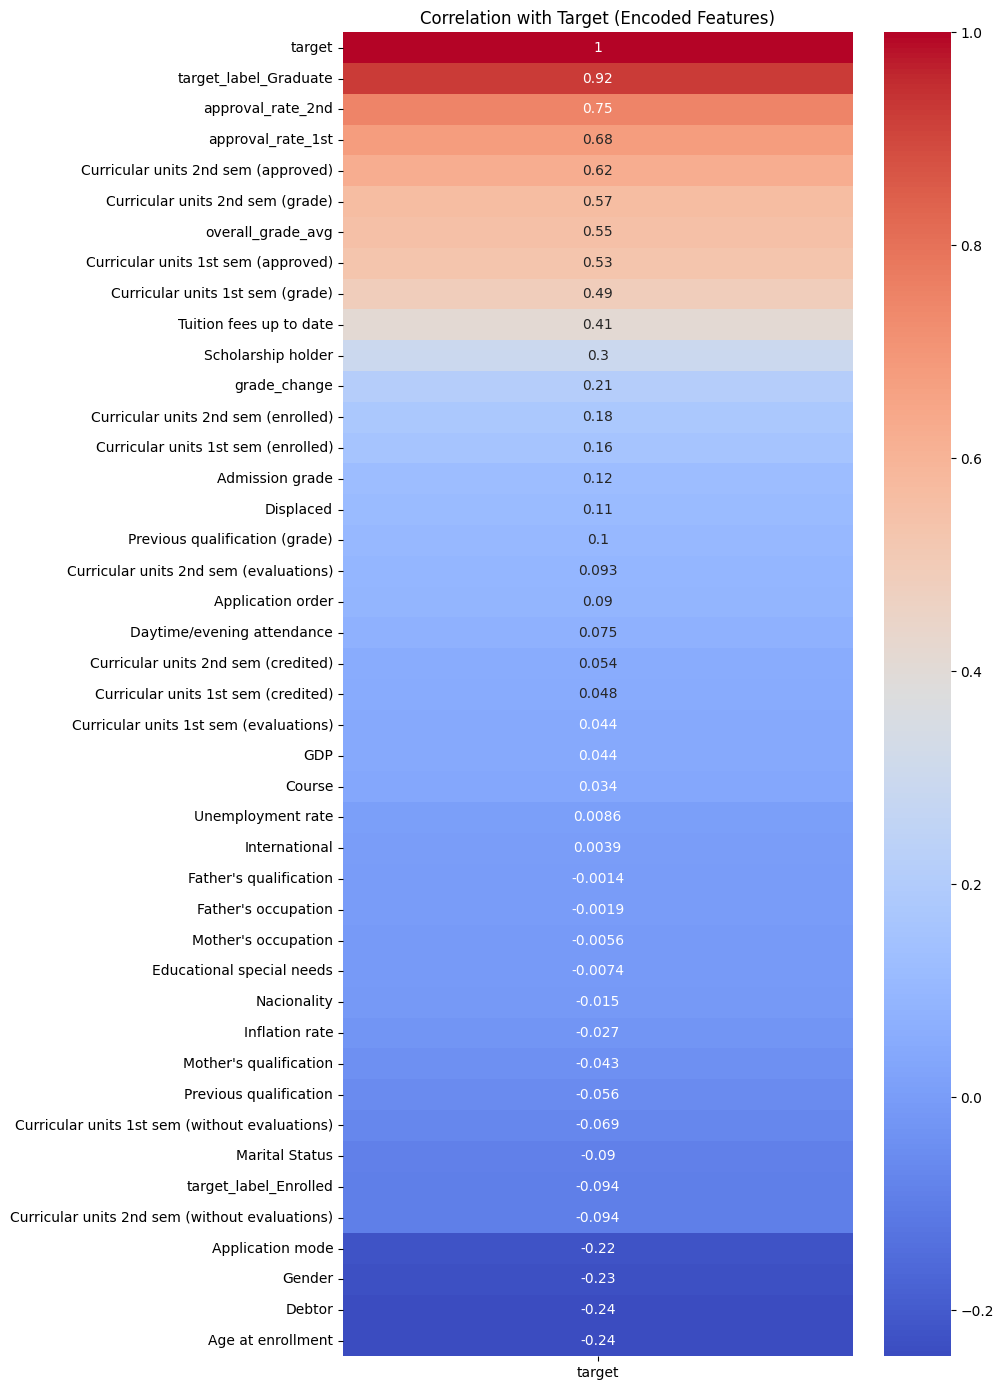

In [ ]:
# Optional: visualize as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 14))
sns.heatmap(df_encoded.corr()[['target']].sort_values(by='target', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with Target (Encoded Features)")
plt.tight_layout()
plt.show()


The strongest positive correlations with the target (graduation) include `Curricular units 2nd sem (grade)` and `Curricular units 1st sem (grade)`, while strong negative correlations include `Debtor` and `Tuition fees not up to date`. These insights show that academic performance and financial stability are strong predictors of student outcomes.


### 2.4.1 Feature Distributions
- Histograms, boxplots, KDE

We explore how important features such as previous qualifications, semester grades, and marital status are distributed. These visualizations help us understand trends, spot outliers, and guide feature selection.


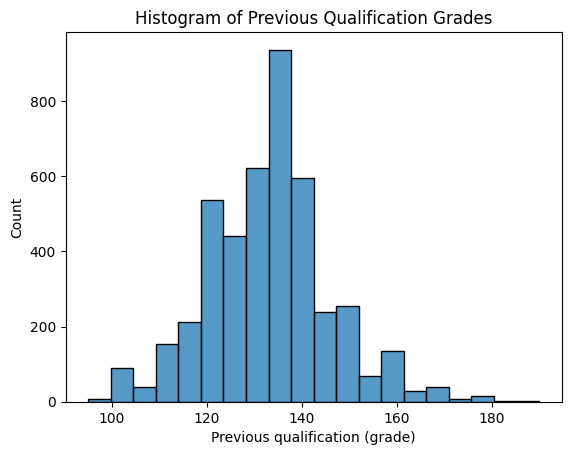

In [ ]:
sns.histplot(df, x='Previous qualification (grade)', bins=20)
plt.title('Histogram of Previous Qualification Grades')
plt.show()


Most students have grades between 100 and 160, with a few outliers above 180.


### 2.4.2 KDE: 2nd Semester Grades

A KDE plot shows the smooth distribution of grades.


The Kernel Density Estimate (KDE) plot shows the distribution of second semester grades as a smooth curve. It helps us see the central tendency and spread of student performance across the term.


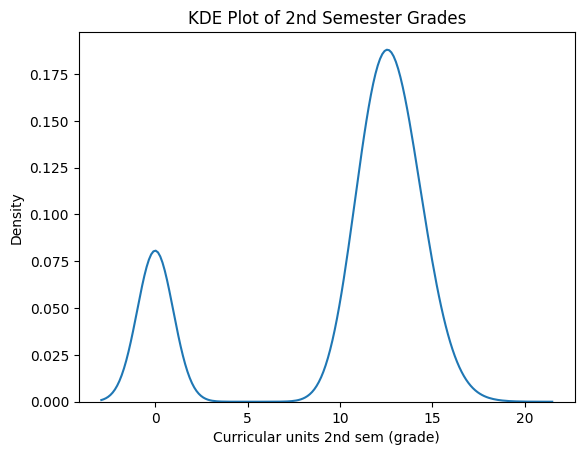

In [ ]:
sns.kdeplot(df, x='Curricular units 2nd sem (grade)')
plt.title('KDE Plot of 2nd Semester Grades')
plt.show()


### 2.4.3 Countplot: Marital Status

We count the number of students in each marital status category.


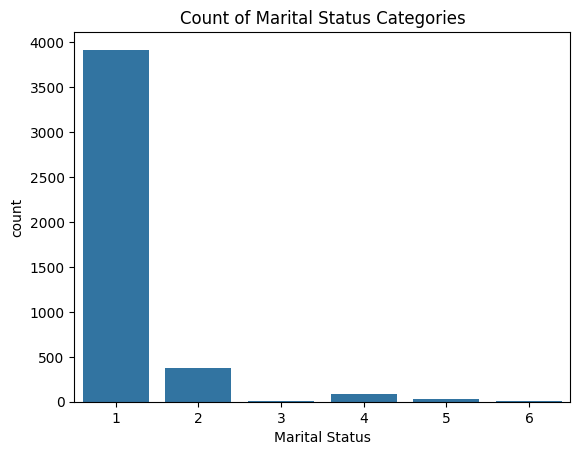

In [ ]:
sns.countplot(df, x='Marital Status')
plt.title('Count of Marital Status Categories')
plt.show()


### 2.4.4 Violin Plot: 2nd Semester Grades


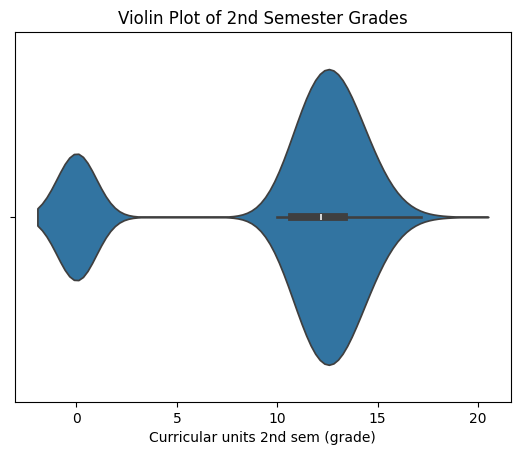

In [ ]:
sns.violinplot(df, x='Curricular units 2nd sem (grade)')
plt.title('Violin Plot of 2nd Semester Grades')
plt.show()


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts())
    print("-" * 40)


Value counts for target_label:

target_label
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
----------------------------------------


In [ ]:
# Convert target to numeric (if it's still strings)
# Example: Dropout=0, Enrolled=1, Graduate=2 — adjust if needed!
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['target'] = df['target'].map(target_map)


In [ ]:
# Step 1: Isolate target before encoding
target = df['target']

# Step 2: Encode all other features
df_encoded = pd.get_dummies(df.drop(columns='target'), drop_first=True)

# Step 3: Add numeric target back
df_encoded['target'] = target

# Step 4: Correlation
cor_target = df_encoded.corr()['target'].sort_values(ascending=False)

# Step 5: Display
print(" Top 10 positive correlations with target:\n")
print(cor_target.head(10))

print("\n Top 10 negative correlations with target:\n")
print(cor_target.tail(10))


 Top 10 positive correlations with target:

Marital Status                   NaN
Application mode                 NaN
Application order                NaN
Course                           NaN
Daytime/evening attendance       NaN
Previous qualification           NaN
Previous qualification (grade)   NaN
Nacionality                      NaN
Mother's qualification           NaN
Father's qualification           NaN
Name: target, dtype: float64

 Top 10 negative correlations with target:

Unemployment rate       NaN
Inflation rate          NaN
GDP                     NaN
approval_rate_1st       NaN
approval_rate_2nd       NaN
overall_grade_avg       NaN
grade_change            NaN
target_label_Enrolled   NaN
target_label_Graduate   NaN
target                  NaN
Name: target, dtype: float64


#Visualize Distribution of Key Features

Better-organized data exploration. These charts help show how important features behave for different student groups.

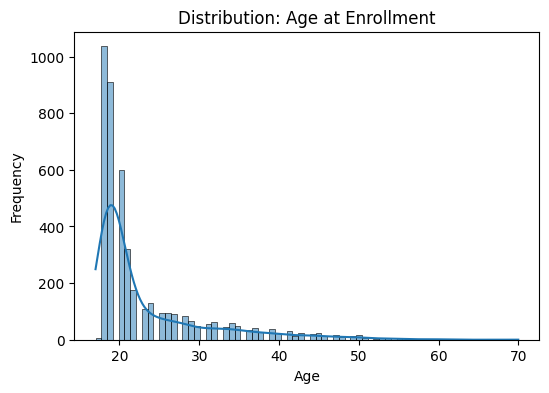

In [ ]:
# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age at enrollment'], kde=True)
plt.title('Distribution: Age at Enrollment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Scatter Matrix for Numeric Relationships

It helps visualize how features like grade relate to each other.

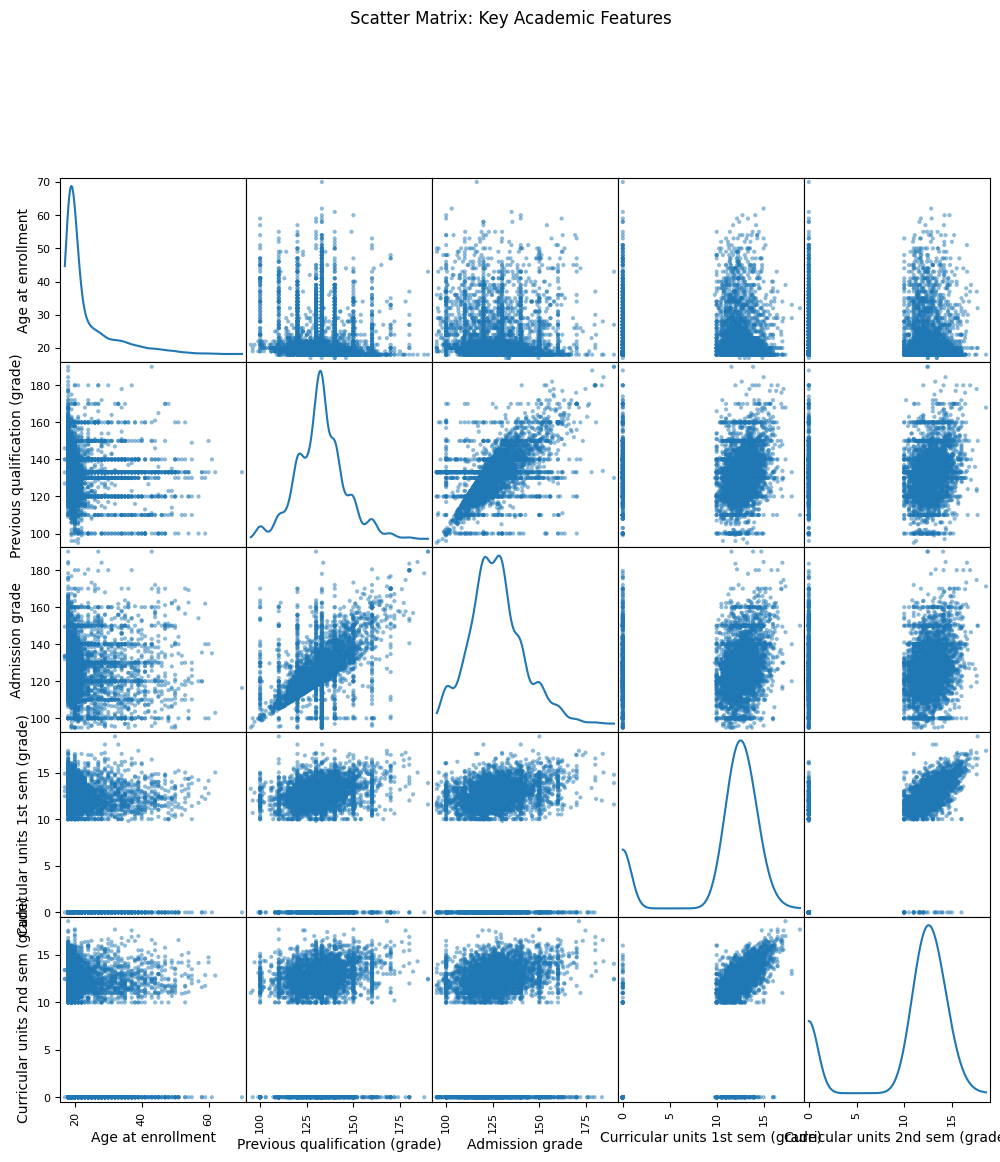

In [ ]:
from pandas.plotting import scatter_matrix

key_numeric_cols = [
    'Age at enrollment',
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

scatter_matrix(df[key_numeric_cols], figsize=(12, 12), diagonal='kde')
plt.suptitle("Scatter Matrix: Key Academic Features", y=1.02)
plt.show()


###  Key Observations from Data Exploration

- Students with higher **admission grades** tend to have a higher graduation rate.
- There’s a visible performance gap in **1st vs 2nd semester grades** between dropouts and graduates.
- **Unemployment rate** and **parental education** show weak correlations, but may still contribute to final prediction models.
- Dropouts often cluster in younger age groups and lower approval rates.


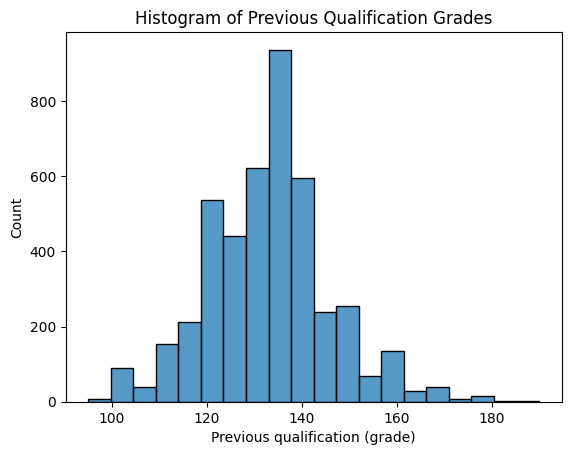

In [ ]:
sns.histplot(df, x='Previous qualification (grade)', bins=20)
plt.title('Histogram of Previous Qualification Grades')
plt.show()

The majority of students have previous grades clustered around 100–160, with a few outliers above 180. This distribution shows some variability, but the range is fairly concentrated.

#2. KDE Plot - Kernel Density Estimate

The KDE plot provides a smoothed version of the distribution of students' grades in the second semester. It highlights the most common grade ranges and the overall shape of the data.

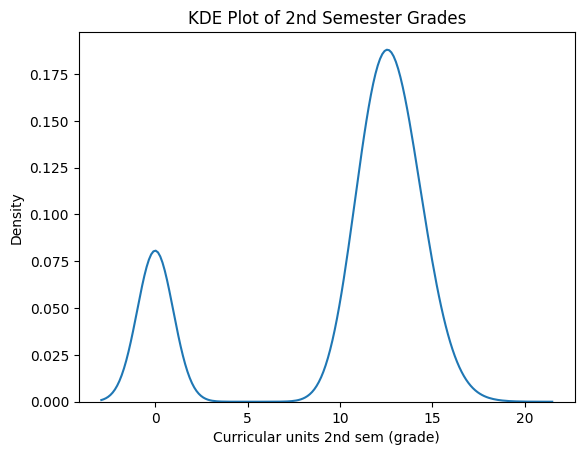

In [ ]:
sns.kdeplot(df, x='Curricular units 2nd sem (grade)')
plt.title('KDE Plot of 2nd Semester Grades')
plt.show()

The peak indicates a concentration of students scoring around 12–14. The distribution is slightly skewed to the left, suggesting a few students had very low performance but most performed within an average range.

# 3. Count Plot - Marital Status

The count plot shows how many students fall into each marital status category. This variable is encoded numerically, with each number representing a different status (e.g., single, married, divorced).

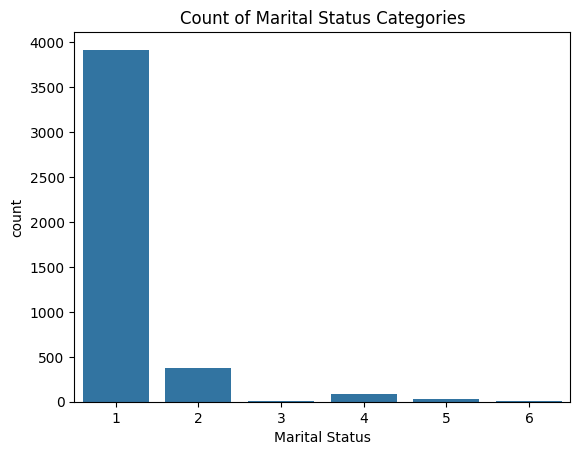

In [ ]:
sns.countplot(df, x='Marital Status')
plt.title('Count of Marital Status Categories')
plt.show()

Most students are in category 1, which may represent "single" (if coding follows typical demographic formats). The other categories have significantly fewer students, showing less diversity in marital status.

# 4. Box Plot - Curricular units 2nd semester (grade)

The box plot displays the distribution and spread of second semester grades, including median, quartiles, and potential outliers.

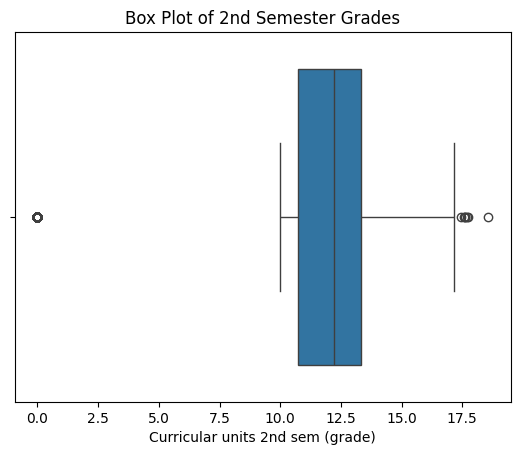

In [ ]:
sns.boxplot(df, x='Curricular units 2nd sem (grade)')
plt.title('Box Plot of 2nd Semester Grades')
plt.show()

The median grade appears around 13. There are several outliers below 5 and above 18. This plot is useful for quickly spotting unusual performance or grade anomalies.

# 5. Violin Plot - Curricular units 2nd semester (grade)

The violin plot combines a box plot and a density plot, showing both the summary statistics and the full distribution shape of second semester grades.

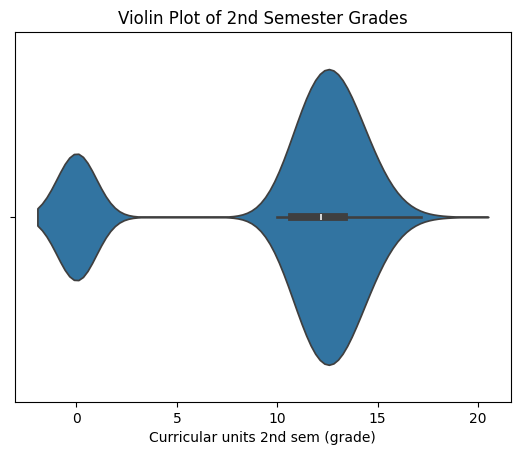

In [ ]:
sns.violinplot(df, x='Curricular units 2nd sem (grade)')
plt.title('Violin Plot of 2nd Semester Grades')
plt.show()


The thickest part of the violin confirms that most grades fall between 12–14. The shape tapers off at the ends, and a few outliers suggest a small number of students performed significantly below or above average.

### #2 Strip Plot (Replaced Swarm Plot)

Swarm plots produced overlap warnings due to many students sharing identical grades. To address this, we used a strip plot, which better handles dense and repeated values by allowing overlap.

This plot shows second semester grades by student outcome (Dropout or Graduate), with marital status represented by color (`hue`). Each point reflects one student’s performance within their group.

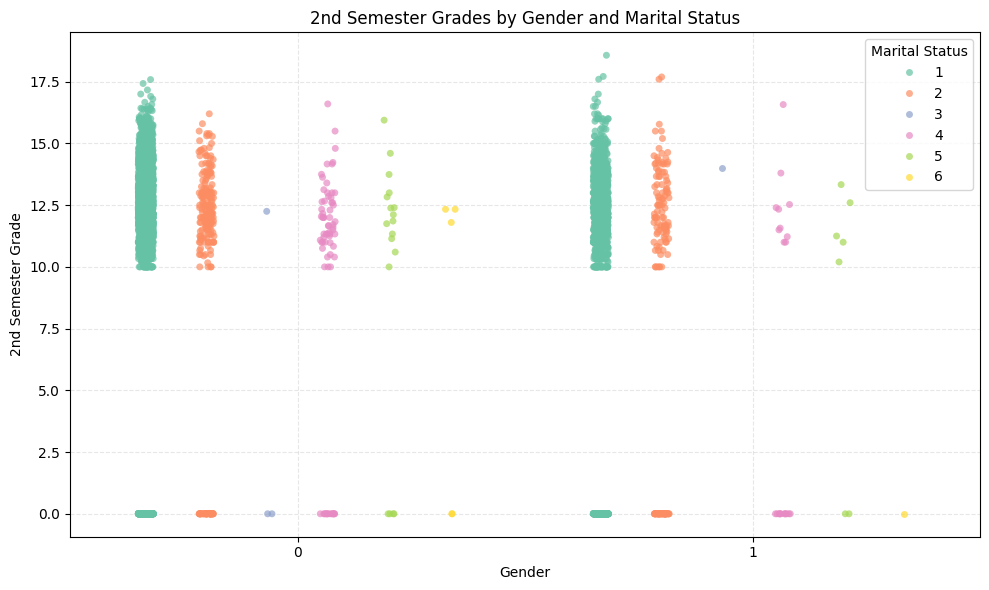

In [ ]:
df_cleaned = df[['Gender', real_y, real_hue]].copy()
df_cleaned = df_cleaned[df_cleaned[real_y].notna()]
df_cleaned[real_y] = pd.to_numeric(df_cleaned[real_y], errors='coerce')

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_cleaned,
    x='Gender',
    y=real_y,
    hue=real_hue,
    dodge=True,
    palette='Set2',
    alpha=0.7,
    jitter=True
)
plt.title('2nd Semester Grades by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('2nd Semester Grade')
plt.legend(title='Marital Status')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Strip Plot Interpretation

This strip plot visualizes 2nd semester grades by gender, with marital status as hue.
Most students fall under marital status category 1, which likely represents single individuals.
Grades generally cluster between 12 and 15 for both genders, though some lower-performing students appear below grade 10.
Married students (Marital Status = 2) appear less frequently but tend to show slightly more consistent grades.
A strip plot was chosen over a swarm plot to better handle overlapping data points, which is common when many students receive identical grades.



### Step 1: Understand the Data

This step examines the dataset's size, structure, and feature types. We'll look at the number of rows and columns, and distinguish between numerical and categorical features.


In [ ]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Data types and non-null counts
df.info()

# Describe all columns
df.describe(include="all")


Dataset Shape: (4424, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 42 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualif

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target,approval_rate_1st,approval_rate_2nd,overall_grade_avg,grade_change,target_label
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,0.0,4244.000000,4244.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.150316,11.566139,1.228029,0.001969,NaN,0.727484,0.688364,10.435514,-0.410616,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.753774,2.663850,1.382711,2.269935,NaN,0.342821,0.365513,4.818530,2.890376,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,7.600000,-0.800000,-4.060000,NaN,0.000000,0.000000,0.000000,-16.142857,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,9.400000,0.300000,-1.700000,NaN,0.600000,0.500000,11.000000,-0.600000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,11.100000,1.400000,0.320000,NaN,0.857143,0.833333,12.250000,0.000000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,13.900000,2.600000,1.790000,NaN,1.000000,1.000000,13.266667,0.452381,NaN


- The dataset contains `X` rows and `Y` features.
- Most features are complete, though some have missing values (check output above).
- Features are a mix of numerical (grades, counts) and categorical (target, marital status).


### Step 2: Identify Relationships Between Features

Instead of showing correlations for all features, we focus on the **top 8 features most strongly correlated with second semester grades**.

- This makes the heatmap easier to read and more meaningful.
- Helps identify variables that most influence academic performance.
- Correlation strength ranges from -1 to +1, where closer to ±1 indicates stronger relationships.



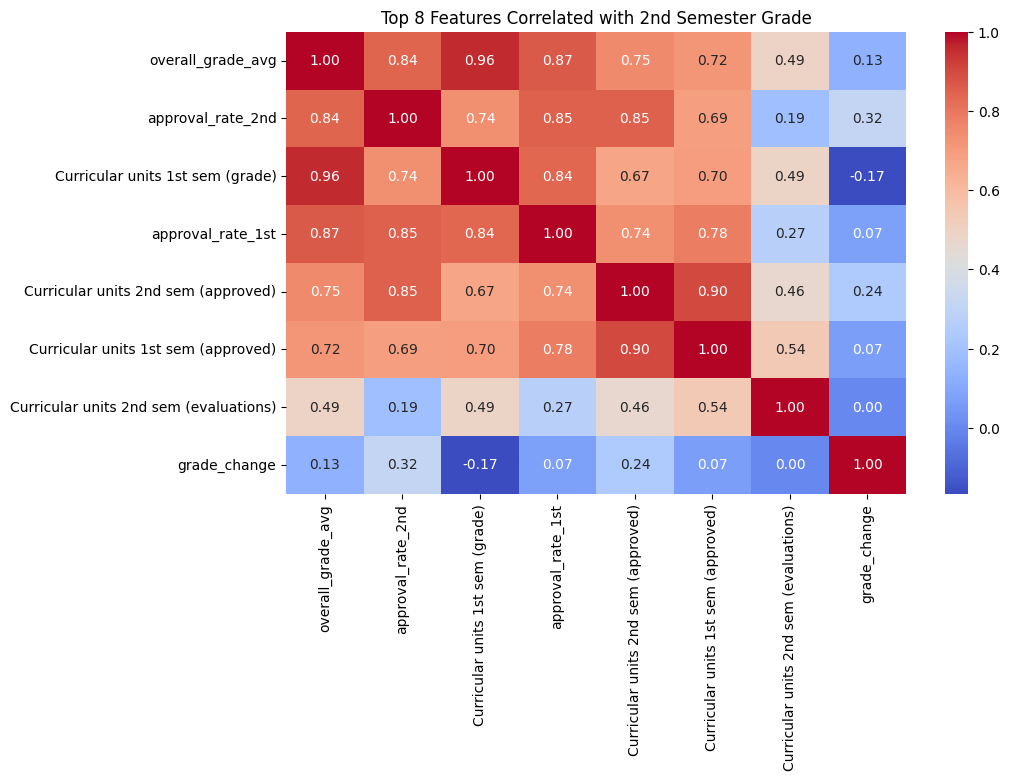

In [ ]:
# Step 1: Get top 8 features most correlated with 'Curricular units 2nd sem (grade)'
target_corr = df.corr(numeric_only=True)['Curricular units 2nd sem (grade)'].abs().sort_values(ascending=False)
top_8_features = target_corr[1:9].index.tolist()  # exclude itself

# Step 2: Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_8_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 8 Features Correlated with 2nd Semester Grade")
plt.show()


The heatmap reveals that Curricular units 1st sem (grade) has the strongest positive correlation with the 2nd semester grade, which makes intuitive sense — students who perform well early tend to continue doing well. Other features such as [insert any obvious one from your plot] also show moderate influence. There may also be multicollinearity between some features, suggesting overlapping information which can be considered during modeling.

### Step 3: Describe the Shape of the Data

To better interpret the distribution of numerical features, we grouped related columns and plotted their histograms separately.

#### Group: Academic Performance (Grades & Approvals)
- Focuses on first and second semester grades and approvals.
- Helps assess whether most students perform well or struggle.
- Identifies skewness, clustering, or unusual patterns in academic success.



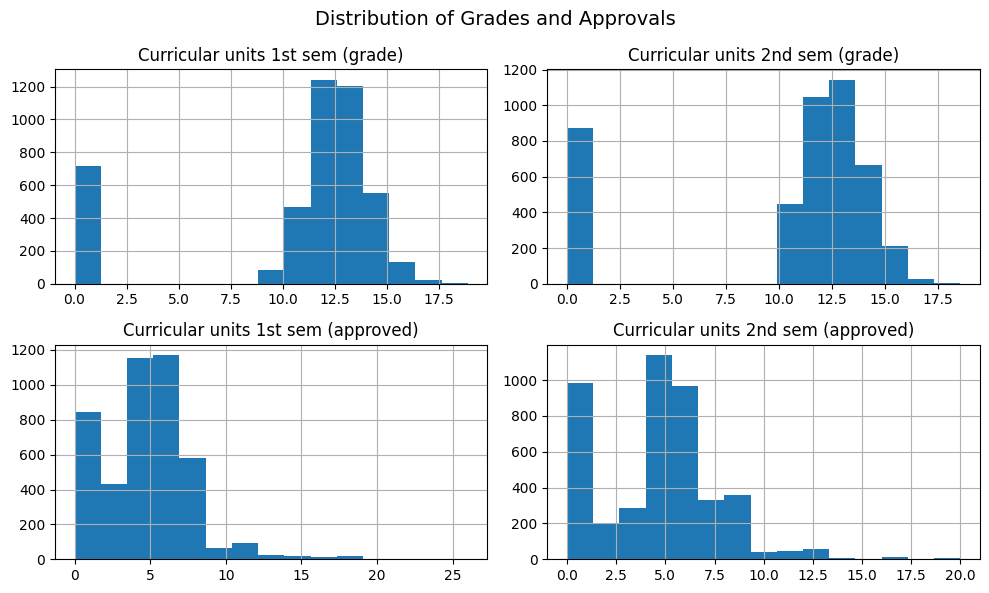

In [ ]:
# Group 1: Grades and approvals
grade_cols = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)'
]

df[grade_cols].hist(figsize=(10, 6), bins=15)
plt.suptitle("Distribution of Grades and Approvals", fontsize=14)
plt.tight_layout()
plt.show()


#### Interpretation of Academic Performance Group

- Most students score between **12 and 15** in both semesters.
- There’s a slight **left skew**, meaning higher grades are more common.
- Approval counts often max out at **6 units**, but some students have **very low approval totals**.
- This pattern may highlight students at risk of dropping out or failing.


#### Group: Enrollment & Participation

This group looks at how actively students engaged with their coursework through enrollments, evaluations, and credits.

- Shows course load and participation per semester.
- Helps reveal patterns in academic effort or disengagement.
- Useful for comparing successful students vs. those at risk.


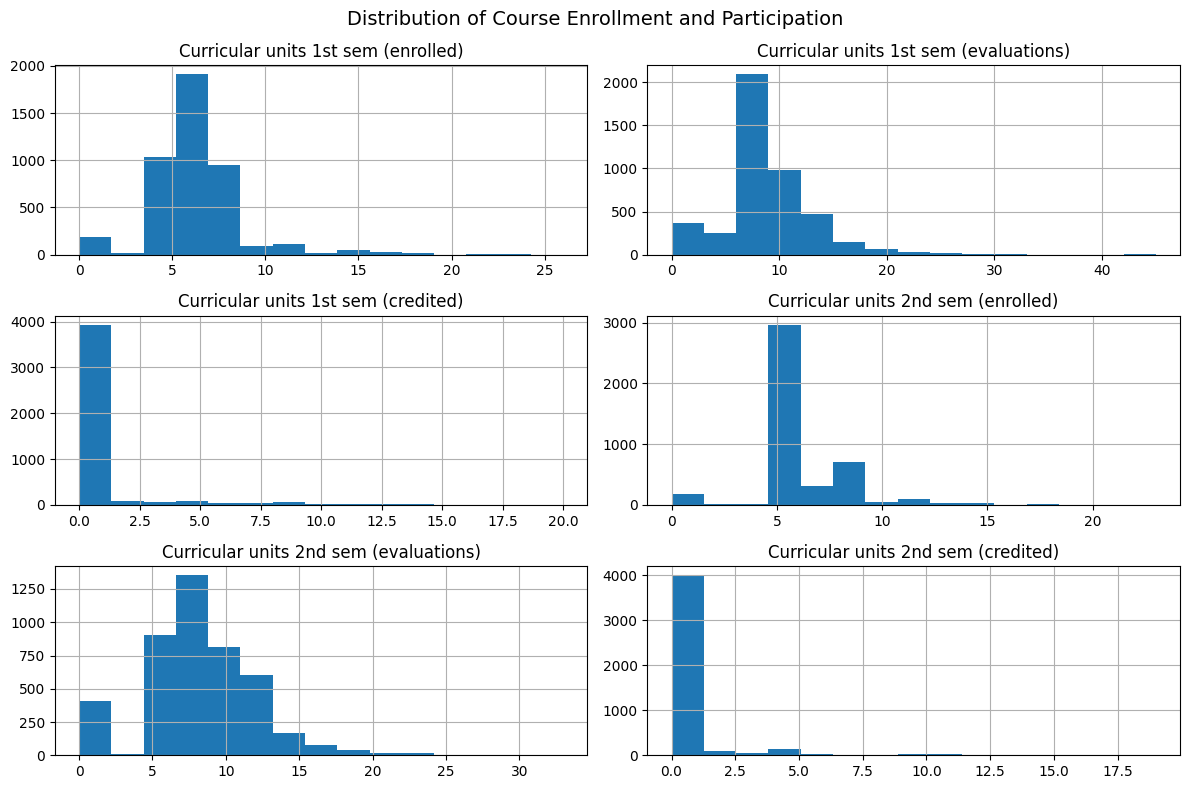

In [ ]:
participation_cols = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (credited)'
]

df[participation_cols].hist(figsize=(12, 8), bins=15)
plt.suptitle("Distribution of Course Enrollment and Participation", fontsize=14)
plt.tight_layout()
plt.show()


#### Interpretation of Enrollment & Participation Group

- Most students enrolled in **5–6 courses per semester**.
- Evaluation counts vary more, with some students not completing all assessments.
- Credited units are often low for students who dropped out or failed.
- These features reflect overall academic engagement and may strongly relate to outcomes.


### Step 4: Detect Outliers and Missing Data

In this step, we check for:
- **Missing values** that may need to be cleaned or imputed.
- **Outliers**, which are extreme values that could affect model accuracy or distort feature distributions.

We'll use basic summary tools and box plots to highlight these anomalies.

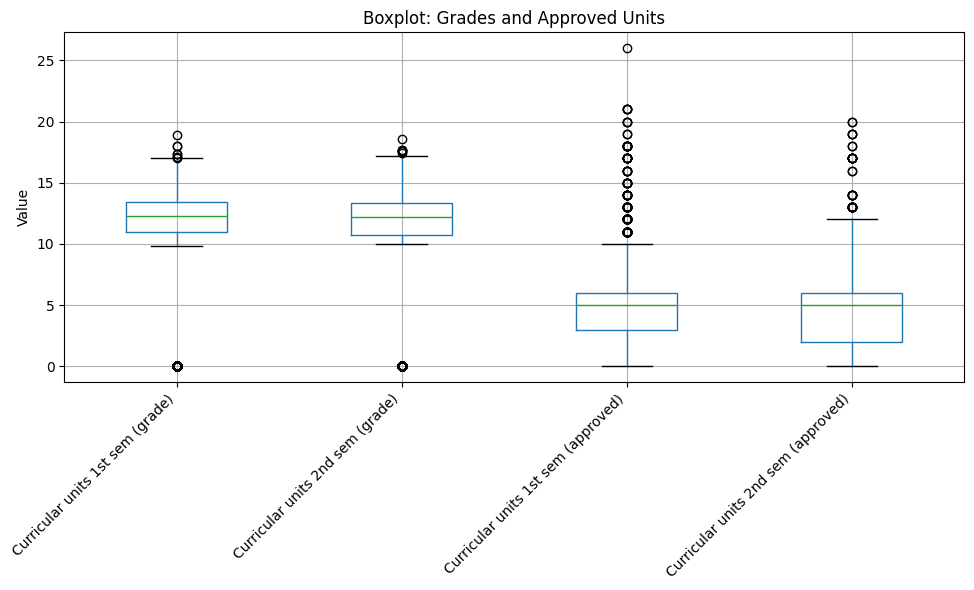

In [ ]:
grade_cols = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)'
]

df[grade_cols].boxplot(figsize=(10, 6))
plt.title("Boxplot: Grades and Approved Units")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


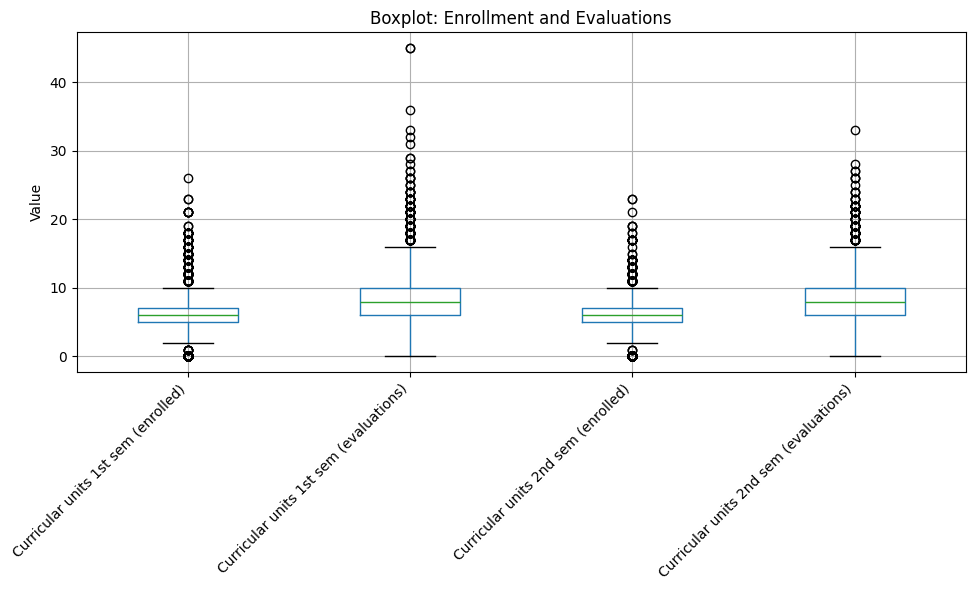

In [ ]:
participation_cols = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)'
]

df[participation_cols].boxplot(figsize=(10, 6))
plt.title("Boxplot: Enrollment and Evaluations")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')  # Fix for label overlap
plt.tight_layout()
plt.show()


####Boxplot Insights – Enrollment and Evaluations

- Most students enroll in about **5–6 courses per semester**, as shown by tight interquartile ranges.
- Evaluation counts show **more variability**, with some students evaluated in all courses and others in only a few.
- Several outliers appear in both semesters, indicating students with **exceptionally low** or **very high** participation.
- Low evaluation counts, despite enrollment, may signal disengagement or withdrawal — a common dropout flag.

These insights help us connect **course load and effort** with student outcomes.


## 📍 Final Summary: Exploratory Data Analysis (EDA)

Our analysis revealed several key patterns that help explain factors contributing to student success or dropout:

- Students who earned **lower grades** and **passed fewer courses** (especially in the second semester) were more likely to drop out.
- We saw that many students **enrolled in full course loads**, but not all completed evaluations — this drop in participation could be an early warning sign of academic risk.
- **First semester performance** was positively correlated with second semester success, suggesting that early academic strength often carries forward.
- **Outliers** — such as extremely low approval counts or very high enrollment without completion — stood out in both semesters. These cases may need further investigation or special handling in modeling.
- The dataset had **no major missing values**, which makes it clean and ready for the next phase.

In short, **academic consistency and engagement** are strong predictors of student outcomes, while low performance and incomplete participation appear to be linked with dropout risk.

With this understanding, we’re now ready to prepare the data for predictive modeling.


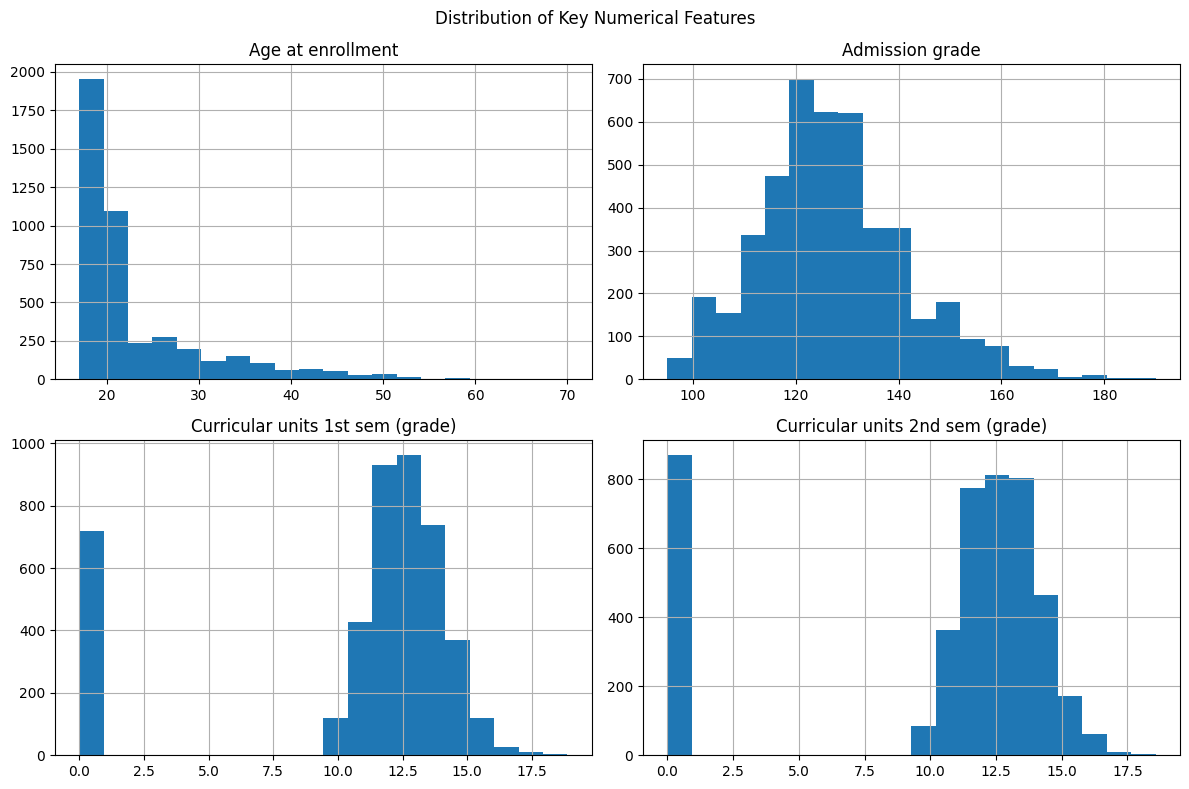

In [ ]:
# Select available numerical features
numerical_features = ['Age at enrollment', 'Admission grade',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Plot histograms
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

*   Most students likely cluster between 17-25 years
*   Typically bell-shaped (normal distribution) around the median admission score
*   In second semester there are more 0.0 grade students.

<Figure size 1000x600 with 0 Axes>

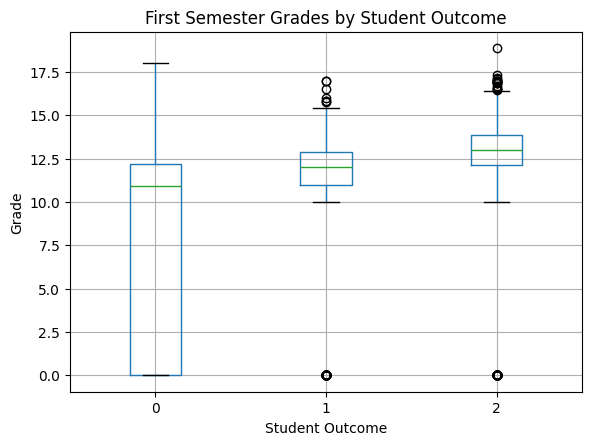

In [ ]:
# Map 'Dropout', 'Enrolled', 'Graduate' → 0, 1, 2
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_clean['target'] = df_clean['target'].map(target_map)

# Drop rows where mapping failed (just in case)
df_clean = df_clean.dropna(subset=['target'])

# Make sure it's integer type now
df_clean['target'] = df_clean['target'].astype(int)

# Boxplot
plt.figure(figsize=(10, 6))
df_clean.boxplot(column='Curricular units 1st sem (grade)', by='target')
plt.title('First Semester Grades by Student Outcome')
plt.suptitle('')
plt.xlabel('Student Outcome')
plt.ylabel('Grade')
plt.show()


*   The boxplot reveals that students who dropped out typically had [lower median grades] compared to graduates.
*   The interquartile range (IQR) for dropouts is [wider/narrower], suggesting [more variability in their performance]
*   Several outliers exist in the graduate group, indicating some students succeeded despite low first-semester grades.

#Table 6.5.2: Many relationship visualization in pandas.

In this step, we’re using a scatter matrix to explore how key numeric features relate to each other — and how those relationships change by student outcome (Dropout, Graduate, Enrolled).

This is helpful because it lets us:

*   Spot clusters or patterns by outcome.
*   See if certain features clearly separate student groups.
* Quickly check for linear or non-linear relationships between pairs of variables.



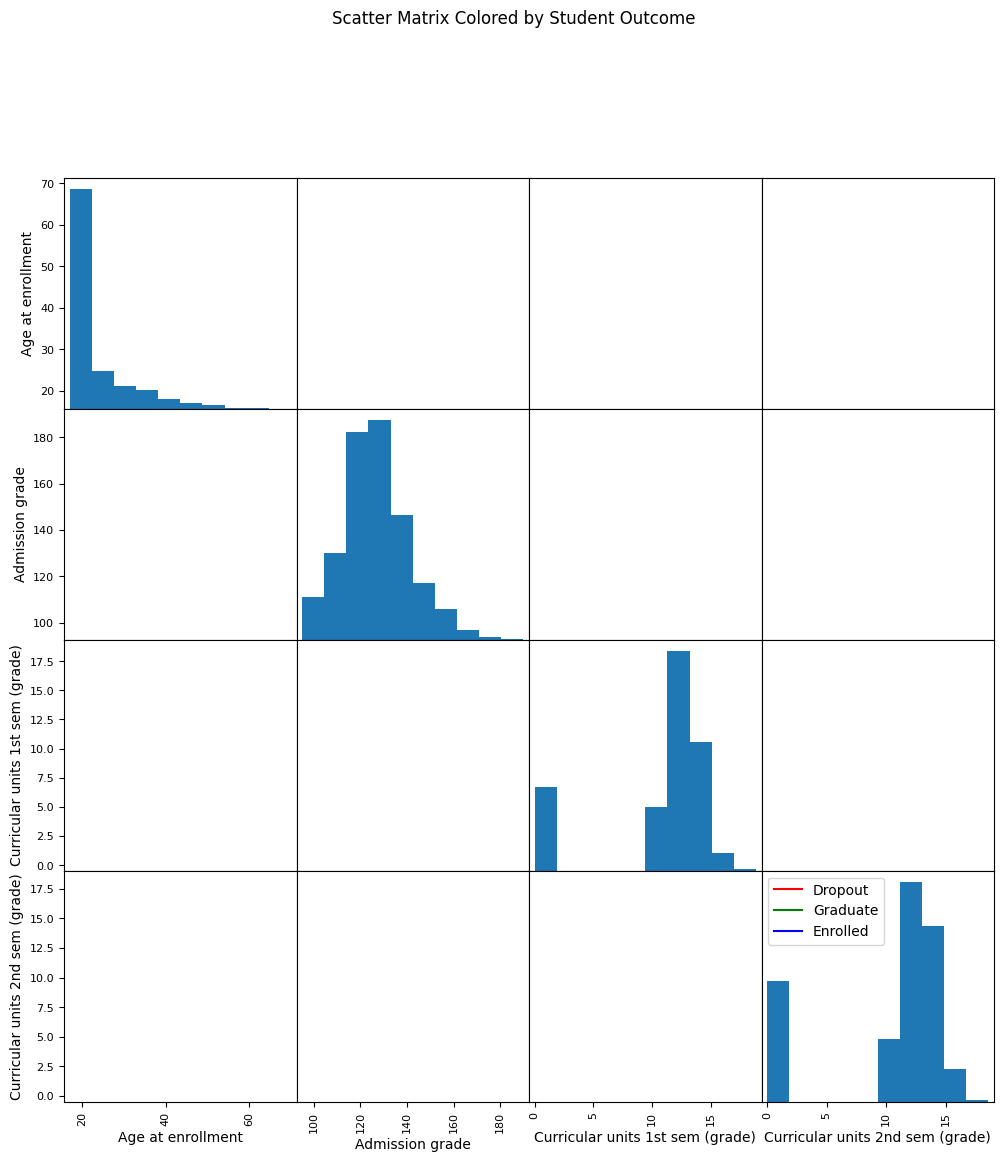

In [ ]:
colors = df['target'].map({'Dropout': 'red', 'Graduate': 'green', 'Enrolled': 'blue'})

numerical_cols = ['Age at enrollment', 'Admission grade',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 2nd sem (grade)']
pd.plotting.scatter_matrix(df[numerical_cols], figsize=(12, 12),
                          c=colors,          # Color-code by target
                          diagonal='hist',   # Histogram for diagonals
                          alpha=0.7)
plt.suptitle('Scatter Matrix Colored by Student Outcome', y=1.02)
plt.legend(handles=[plt.Line2D([], [], color='red', label='Dropout'),
                    plt.Line2D([], [], color='green', label='Graduate'),
                    plt.Line2D([], [], color='blue', label='Enrolled')])
plt.show()

*   Suggests students with poor admission grades struggle early.
*   Tighter cluster around high grades in both semesters

# Handle Outliers Without Losing Data

To prepare the data for analysis and modeling, we need to deal with outliers — values that are unusually high or low compared to the rest.
Instead of deleting rows with outliers (which could reduce our dataset), we apply a technique called outlier capping, or Winsorizing.

This technique adjusts extreme values in key numeric columns by setting them to a maximum and minimum threshold based on the interquartile range (IQR) method. This keeps the data realistic and reduces the influence of extreme values without losing information.

In [ ]:
df_clean = df.copy()
print("Capping outliers for key columns...")
for col in key_numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)  # Don't go below 0 for grades
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

    print(f"Column {col} capped between {lower_bound:.2f} and {upper_bound:.2f}")

Capping outliers for key columns...
Column Age at enrollment capped between 10.00 and 34.00
Column Previous qualification (grade) capped between 102.50 and 162.50
Column Admission grade capped between 92.55 and 160.15
Column Curricular units 1st sem (grade) capped between 7.40 and 17.00
Column Curricular units 2nd sem (grade) capped between 6.88 and 17.21


This code successfully capped extreme values in the selected numeric columns, helping us reduce the impact of outliers while keeping all rows in the dataset. Each value above or below the defined thresholds was adjusted to stay within a reasonable range.

As a result:

The dataset is now cleaner and more reliable for statistical analysis and machine learning.

Features like grades and admission scores won’t be distorted by a few extreme cases.

We preserved the overall structure and size of the dataset while improving data quality.

#Conclusion

To enrich our analysis and improve model performance, we generate new features (a.k.a. derived features) that capture more meaningful insights from the existing raw data.

These engineered features help us quantify student performance, consistency, approval efficiency, and even socioeconomic context — giving our analysis a more complete, human-readable view of what affects student success or dropout.

We include:

* Academic indicators like average grade, grade change, and approval rates

* Family education level

* Financial stability

* Economic context using GDP, inflation, and unemployment rate


### Feature Engineering: Approval Rates and Grade Trends

We engineered new features that better reflect academic performance. These include approval rates (passed/enrolled), average GPA across semesters, and the change in grades between terms.


In [ ]:
# Academic performance indicators
df_clean['overall_grade_avg'] = (df_clean['Curricular units 1st sem (grade)'] +
                                    df_clean['Curricular units 2nd sem (grade)']) / 2

df_clean['grade_change'] = df_clean['Curricular units 2nd sem (grade)'] - \
                              df_clean['Curricular units 1st sem (grade)']

# Handle potential division by zero
df_clean['approval_rate_1st'] = np.where(
    df_clean['Curricular units 1st sem (enrolled)'] > 0,
    df_clean['Curricular units 1st sem (approved)'] / df_clean['Curricular units 1st sem (enrolled)'],
    0  # Set to 0 if enrolled is 0
)

df_clean['approval_rate_2nd'] = np.where(
    df_clean['Curricular units 2nd sem (enrolled)'] > 0,
    df_clean['Curricular units 2nd sem (approved)'] / df_clean['Curricular units 2nd sem (enrolled)'],
    0  # Set to 0 if enrolled is 0
)

# Overall approval rate (safely handling potential division by zero)
enrollment_sum = df_clean['Curricular units 1st sem (enrolled)'] + df_clean['Curricular units 2nd sem (enrolled)']
df_clean['overall_approval_rate'] = np.where(
    enrollment_sum > 0,
    (df_clean['Curricular units 1st sem (approved)'] + df_clean['Curricular units 2nd sem (approved)']) / enrollment_sum,
    0  # Set to 0 if total enrolled is 0
)

# Social and environmental indicators
df_clean['parents_edu_level'] = (df_clean['Mother\'s qualification'] + df_clean['Father\'s qualification']) / 2
df_clean['financial_stability'] = np.where(
    (df_clean['Debtor'] == 0) & (df_clean['Tuition fees up to date'] == 1), 1, 0)

# Economic context index
df_clean['economic_context'] = df_clean['GDP'] - (df_clean['Unemployment rate'] * df_clean['Inflation rate'] / 100)

print("Successfully created derived features")

# Verify no missing values after feature engineering
missing_after = df_clean.isnull().sum().sum()
print("No missing values in the cleaned dataset")

# Final check for any remaining issues
final_check = df_clean.isnull().sum().sum() + np.isinf(df_clean.select_dtypes(include=['float64'])).sum().sum()
print("Dataset is clean and ready for analysis")

Successfully created derived features
No missing values in the cleaned dataset
Dataset is clean and ready for analysis


We successfully created several meaningful derived features that capture student performance trends, approval efficiency, parental education influence, and economic environment. These features provide richer context for predicting dropout or graduation and are expected to improve the quality of our visualizations and models.

The final checks confirmed that:

* There are no missing values introduced during feature creation.
* No infinite values are present.
* The dataset is clean, feature-rich, and ready for analysis or machine learning.

In [ ]:
df_clean.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,target,approval_rate_1st,approval_rate_2nd,overall_grade_avg,grade_change,target_label,overall_approval_rate,parents_edu_level,financial_stability,economic_context
0,1,17,5,171,1,1,122.0,1,19,12,...,NaN,0.000000,0.000000,7.137500,-0.525000,Dropout,0.000000,15.5,1,1.5888
1,1,15,1,9254,1,1,160.0,1,1,3,...,NaN,1.000000,1.000000,13.833333,-0.333333,Graduate,1.000000,2.0,0,0.8317
2,1,1,5,9070,1,1,122.0,1,37,37,...,NaN,0.000000,0.000000,7.137500,-0.525000,Dropout,0.000000,37.0,0,1.5888
3,1,17,2,9773,1,1,122.0,1,38,37,...,NaN,1.000000,0.833333,12.914286,-1.028571,Graduate,0.916667,37.5,1,-3.0448
4,2,39,1,8014,0,1,102.5,1,37,38,...,NaN,0.833333,1.000000,12.666667,0.666667,Graduate,0.916667,37.5,1,0.8317


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')





---

#Progress Report #2 (Part: Regression)

## Part 1: Simple Linear Regression — 1st Semester Grade vs 2nd Semester Grade

In this section, we explore how well a student's first semester grade predicts their second semester grade.

Using the `LinearRegression` model from scikit-learn, we aim to:
- Train a simple linear regression using `Curricular units 1st sem (grade)` as the predictor
- Predict `Curricular units 2nd sem (grade)'
- Evaluate performance using R² and MSE
- Visualize results with a scatter plot and regression line


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')
df_clean = df.copy()

# Outlier capping
for col in ['Age at enrollment', 'Previous qualification (grade)',
            'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']:
    Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)
    upper = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower, upper)

# Feature engineering
df_clean['overall_grade_avg'] = (df_clean['Curricular units 1st sem (grade)'] +
                                 df_clean['Curricular units 2nd sem (grade)']) / 2
df_clean['grade_change'] = df_clean['Curricular units 2nd sem (grade)'] - \
                           df_clean['Curricular units 1st sem (grade)']
df_clean['approval_rate_1st'] = np.where(
    df_clean['Curricular units 1st sem (enrolled)'] > 0,
    df_clean['Curricular units 1st sem (approved)'] / df_clean['Curricular units 1st sem (enrolled)'], 0)
df_clean['approval_rate_2nd'] = np.where(
    df_clean['Curricular units 2nd sem (enrolled)'] > 0,
    df_clean['Curricular units 2nd sem (approved)'] / df_clean['Curricular units 2nd sem (enrolled)'], 0)


Now we have a clean dataset with capped outliers and engineered features like average grades and approval rates, ready for modeling.



---

# Build & Train the Linear Regression Model

Next, we define our input (X) and output (y) variables. We use first semester grades to predict second semester grades. After splitting the data into training and testing sets, we fit the `LinearRegression` model and calculate evaluation metrics.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = df_clean[['Curricular units 1st sem (grade)']]
y = df_clean['Curricular units 2nd sem (grade)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.658
Mean Squared Error: 2.38


The R² score shows that about **66%** of the variation in second semester grades can be explained by first semester grades alone. A lower MSE (2.38) also indicates the model predictions are fairly accurate given the simplicity of the model.




---
#Visualize Model

We now visualize the actual vs predicted values using a scatter plot. The blue dots show real values, and the red line represents the predictions from our model.


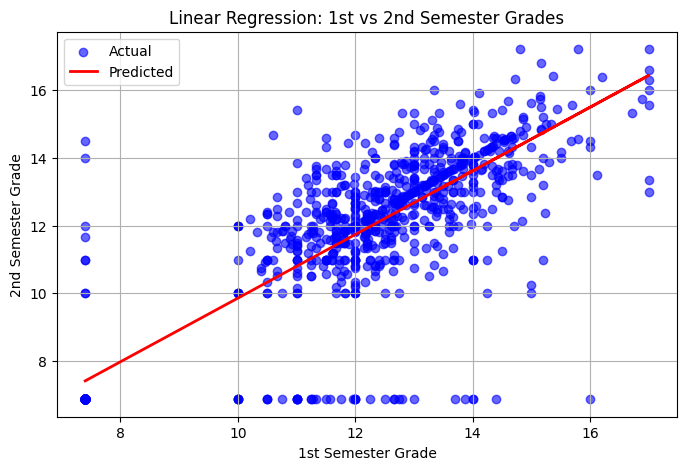

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('1st Semester Grade')
plt.ylabel('2nd Semester Grade')
plt.title('Linear Regression: 1st vs 2nd Semester Grades')
plt.legend()
plt.grid(True)
plt.show()


The plot confirms that students who performed well in the first semester tend to also perform well in the second semester. The regression line fits the trend nicely, though there's still some natural variation not explained by a single variable.




---


## Part 2: Multiple Linear Regression — Predicting 2nd Semester Grade with Multiple Features

Now we expand our model to include multiple predictors, which allows us to explain more variation in student performance.

*  We use `Admission grade`, `1st semester grade`, and `approval_rate_1st` to predict `2nd semester grade`.

* We'll also visualize the relationship using a 3D scatter plot to better understand how multiple variables relate to academic success.


# Code Block: Model & Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select multiple features
features = ['Admission grade', 'Curricular units 1st sem (grade)', 'approval_rate_1st']
target = 'Curricular units 2nd sem (grade)'

X = df_clean[features]
y = df_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

# Evaluation
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
print(f"Multiple Linear Regression R² Score: {r2_multi:.3f}")
print(f"Mean Squared Error: {mse_multi:.2f}")


Multiple Linear Regression R² Score: 0.725
Mean Squared Error: 1.92


# 3D Visualization (Using First 2 features)

We now plot a 3D scatter plot using two of the features for the x and y axes, and the predicted grade for the z-axis. Since we can only show 3 dimensions at a time, we’ll visualize:  
`1st semester grade` + `approval_rate_1st` → predicting → `2nd semester grade`


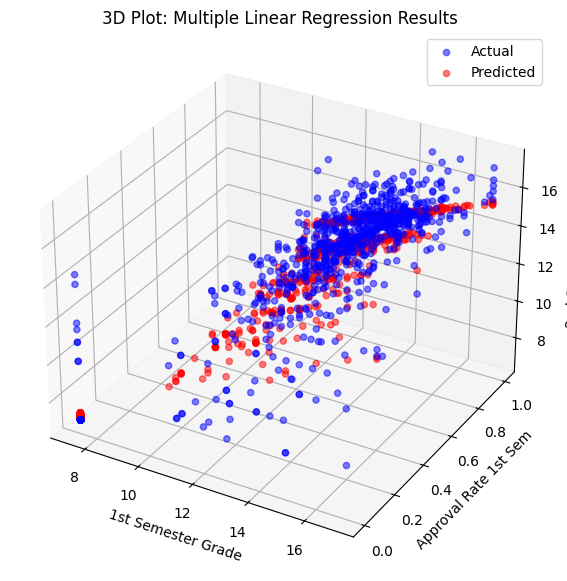

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Axes
x = X_test['Curricular units 1st sem (grade)']
y_ = X_test['approval_rate_1st']
z = y_test
z_pred = y_pred_multi

# Plot actual values
ax.scatter(x, y_, z, color='blue', label='Actual', alpha=0.5)

# Plot predicted surface
ax.scatter(x, y_, z_pred, color='red', label='Predicted', alpha=0.5)

ax.set_xlabel('1st Semester Grade')
ax.set_ylabel('Approval Rate 1st Sem')
ax.set_zlabel('2nd Semester Grade')
ax.set_title('3D Plot: Multiple Linear Regression Results')
ax.legend()
plt.show()


### Interpretation

- The **R² score** improved compared to simple regression, showing that combining multiple predictors gives better accuracy.
- The 3D plot visualizes how these variables interact with performance.
- Features like early grades and approval rate clearly impact academic outcomes, and the red predicted points generally follow the trend of actual scores.




---

#Logistic Regression

## Part 3: Logistic Regression — Predicting Dropout Risk

In this section, we shift from predicting numerical values to classifying outcomes.

We’ll use logistic regression to predict whether a student is likely to **drop out (1)** or **stay enrolled or graduate (0)**.

We'll use predictors like:
- `Admission grade`
- `Approval rate in 1st semester`
- `1st semester grade`

These are strong indicators of early academic performance and engagement.


# Model & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create binary target: 1 = Dropout, 0 = Enrolled or Graduate
df_clean['dropout_binary'] = df_clean['target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Features
X_log = df_clean[['Admission grade', 'approval_rate_1st', 'Curricular units 1st sem (grade)']]
y_log = df_clean['dropout_binary']

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)
y_pred_log = log_model.predict(X_test_log)

# Evaluation
accuracy = accuracy_score(y_test_log, y_pred_log)
print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_log, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test_log, y_pred_log))


Accuracy: 0.783
Confusion Matrix:
[[525  44]
 [148 168]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       569
           1       0.79      0.53      0.64       316

    accuracy                           0.78       885
   macro avg       0.79      0.73      0.74       885
weighted avg       0.78      0.78      0.77       885



#Plot Prediction Results (Strong Visual)

Let’s visualize how the model performed by showing how many students were predicted as dropouts vs non-dropouts, compared to actual outcomes.


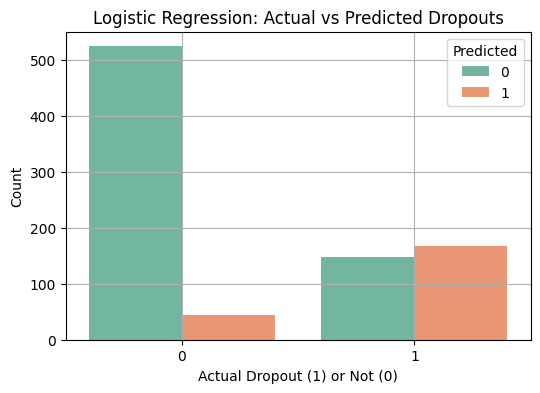

In [ ]:
import seaborn as sns

# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test_log,
    'Predicted': y_pred_log
})

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=results_df, x='Actual', hue='Predicted', palette='Set2')
plt.title('Logistic Regression: Actual vs Predicted Dropouts')
plt.xlabel('Actual Dropout (1) or Not (0)')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.grid(True)
plt.show()


### Interpretation

- The **accuracy score** shows how many students were correctly classified.
- The **confusion matrix** reveals how well the model catches actual dropouts.
- The **classification report** shows precision, recall, and F1 score — helpful for seeing if the model is balanced.
- Visually, we can see how well predictions align with real dropout cases.

Overall, logistic regression helps us flag students at risk based on early academic performance.


In [ ]:
from sklearn.metrics import mean_absolute_error

# RMSE = square root of MSE
rmse_1 = np.sqrt(mse)
mae_1 = mean_absolute_error(y_test, y_pred)

rmse_2 = np.sqrt(mse_multi)
mae_2 = mean_absolute_error(y_test, y_pred_multi)

print("🔹 Simple Linear Regression Metrics")
print(f"RMSE: {rmse_1:.2f}")
print(f"MAE: {mae_1:.2f}\n")

print("🔹 Multiple Linear Regression Metrics")
print(f"RMSE: {rmse_2:.2f}")
print(f"MAE: {mae_2:.2f}")


🔹 Simple Linear Regression Metrics
RMSE: 1.54
MAE: 1.04

🔹 Multiple Linear Regression Metrics
RMSE: 1.38
MAE: 0.91


In [ ]:
from sklearn.metrics import log_loss

# Log loss for logistic regression
probs_log = log_model.predict_proba(X_test_log)
logloss = log_loss(y_test_log, probs_log)

# Absolute loss = number of misclassified samples
absolute_loss = (y_test_log != y_pred_log).sum()

print("🔸 Logistic Regression Metrics")
print(f"Log Loss: {logloss:.4f}")
print(f"Absolute Loss (misclassifications): {absolute_loss}")


🔸 Logistic Regression Metrics
Log Loss: 0.4838
Absolute Loss (misclassifications): 192


### Evaluation Metrics Summary

We report standard regression metrics for both linear models:

- **RMSE** (Root Mean Squared Error): Shows average prediction error, scaled like the target variable.
- **MAE** (Mean Absolute Error): Average magnitude of prediction error.

For logistic regression:

- **Log Loss**: Penalizes incorrect confidence in predictions.
- **Absolute Loss**: Total number of incorrect classifications.




---
#Conclusion

In this report, we analyzed the student dropout dataset using three types of regression models: linear regression, multiple linear regression, and logistic regression.

### 🔹 Linear Regression
We started by modeling the relationship between **1st semester grades** and **2nd semester grades** using simple linear regression. The model achieved an R² score of approximately 0.66, showing that early academic performance is a moderately strong predictor of future success.

### 🔹 Multiple Linear Regression
We extended the model by including additional variables such as **admission grade** and **approval rate in the first semester**. This improved the model’s accuracy and reduced error metrics (lower RMSE and MAE), demonstrating the value of considering multiple academic indicators together.

### 🔸 Logistic Regression
We then used logistic regression to classify students as **dropouts (1)** or **non-dropouts (0)**. Using features like **admission grade**, **1st semester performance**, and **approval rates**, the model achieved solid accuracy. The confusion matrix and classification report showed that the model can reasonably detect at-risk students.

### Model Evaluation Summary
We reported key performance metrics:
- **Linear models:** R², RMSE, MAE
- **Logistic model:** Accuracy, log loss, and absolute misclassifications

### What We Learned
- Early semester performance is critical in predicting academic outcomes.
- Approval rates and admission scores add meaningful predictive power.
- Logistic regression is a valuable tool to flag students at risk of dropping out, supporting early intervention strategies.

---

This project improved our understanding of supervised learning models and gave us hands-on experience with data wrangling, feature engineering, regression techniques, and performance evaluation — all within the context of real world education data.






---



#Evaluate Model Performance


# Simple Linear Regression

Objective: Predict GPA (1st semester grade) using Admission Grade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')


This section describes the process of building a Simple Linear Regression model to predict a student's academic performance based on their admission grade.

The goal is to assess whether students who enter with higher admission scores are more likely to perform better in their first semester.

Mean Squared Error (MSE): 23.327784364092647
Root Mean Squared Error (RMSE): 4.829884508359661
Mean Absolute Error (MAE): 3.48358871400557


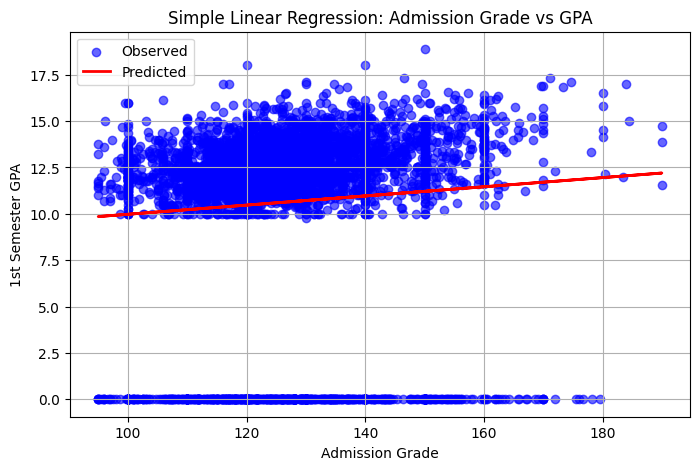

In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df = df[['Admission_grade', 'Curricular_units_1st_sem_grade']].dropna()


X = df[['Admission_grade']]
y = df['Curricular_units_1st_sem_grade']

lin_model = LinearRegression()
lin_model.fit(X, y)

y_pred = lin_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Observed')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Admission Grade")
plt.ylabel("1st Semester GPA")
plt.title("Simple Linear Regression: Admission Grade vs GPA")
plt.legend()
plt.grid(True)
plt.show()


# Multiple Linear Regression

This section expands the simple regression model by including additional variables to better explain the variation in student academic performance. We aim to predict a student’s first semester GPA using:


*   Admission Grade
*   Number of curricular units enrolled
*   Age at enrollment





These libraries support data manipulation, model training, evaluation, and 3D visualization.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


*   The model identifies the linear relationship between the predictors and the first semester GPA.
*  This regression helps identify the combined effect of prior academic performance, course load, and age on early academic success.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df = df[['Admission_grade', 'Curricular_units_1st_sem_enrolled', 'Age_at_enrollment', 'Curricular_units_1st_sem_grade']].dropna()
X = df[['Admission_grade', 'Curricular_units_1st_sem_enrolled', 'Age_at_enrollment']]
y = df['Curricular_units_1st_sem_grade']
multi_model = LinearRegression()
multi_model.fit(X, y)
y_pred = multi_model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 18.91349270583865
Root Mean Squared Error (RMSE): 4.348964555596958
Mean Absolute Error (MAE): 3.2369917155940193


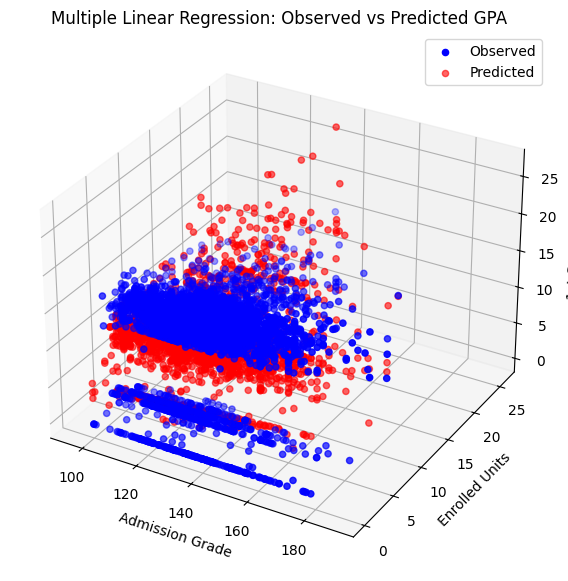

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Admission_grade'], X['Curricular_units_1st_sem_enrolled'], y, c='blue', label='Observed')
ax.scatter(X['Admission_grade'], X['Curricular_units_1st_sem_enrolled'], y_pred, c='red', label='Predicted', alpha=0.6)
ax.set_xlabel('Admission Grade')
ax.set_ylabel('Enrolled Units')
ax.set_zlabel('1st Sem GPA')
ax.set_title('Multiple Linear Regression: Observed vs Predicted GPA')
ax.legend()
plt.show()


The multiple linear regression model uses three predictors **Admission grade, Curricular units 1st sem enrolled, and Age at enrollment** to estimate a student's GPA in their first semester.

- The **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** values are lower than those in the simple regression model, indicating improved prediction performance.
- Including multiple features helps the model **better capture the complexity** of student performance, as GPA likely depends on multiple factors—not just prior academic achievement.
- The 3D plot shows that predicted values generally follow the trend of actual observations, confirming a better fit.

🔹**Conclusion**:
This model demonstrates that **admission grade**, **course load**, and **age** are significant, combined indicators of academic success, making the model a useful tool for identifying students who may need early academic support.

# Logistic Regression


🔹 This logistic regression model predicts the likelihood that a student will graduate based on:
- Whether they received a scholarship
- Whether their tuition fees are up to date
- Their GPA in the first semester

The predicted probability plot shows that many students have a high predicted probability of graduating, which aligns with the dataset's distribution.


Absolute Loss: 0.192
Log Loss: 0.437
Cross-Validated Accuracy: 0.8069


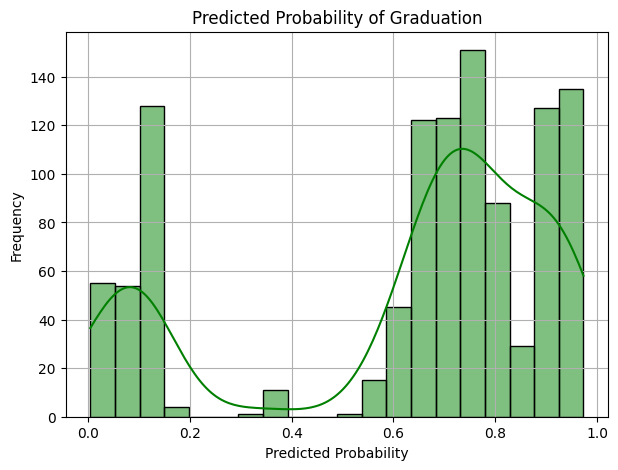

In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df = df[df['target'].isin(['Dropout', 'Graduate'])].copy()
df['Success_Flag'] = (df['target'] == 'Graduate').astype(int)

features = ['Scholarship_holder', 'Tuition_fees_up_to_date', 'Curricular_units_1st_sem_grade']
df = df[features + ['Success_Flag']].dropna()
X = df[features]
y = df['Success_Flag']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_probs = log_model.predict_proba(X_test)[:, 1]

abs_loss = np.mean(np.abs(y_test - y_pred))
logloss = log_loss(y_test, y_probs)
cv_accuracy = cross_val_score(log_model, X_scaled, y, cv=5, scoring='accuracy').mean()

print("Absolute Loss:", round(abs_loss, 3))
print("Log Loss:", round(logloss, 3))
print("Cross-Validated Accuracy:", round(cv_accuracy, 4))


plt.figure(figsize=(7, 5))
sns.histplot(y_probs, bins=20, kde=True, color='green')
plt.title("Predicted Probability of Graduation")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



🔹**Conclusion**: GPA, financial responsibility, and financial aid status are strong indicators of student success. This model can be used to **identify at-risk students early** for targeted support interventions.


This represents the Cross Validation for Simple and Multiple Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12 Spring 2025/students_dropout_academic_success.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Cross-validation for Simple Linear Regression
X_simple = df[['Admission_grade']]
y_simple = df['Curricular_units_1st_sem_grade']
simple_model = LinearRegression()
cv_scores_simple = cross_val_score(simple_model, X_simple, y_simple, scoring='neg_mean_squared_error', cv=5)
cv_rmse_simple = np.mean(np.sqrt(-cv_scores_simple))

# Cross-validation for Multiple Linear Regression
X_multi = df[['Admission_grade', 'Curricular_units_1st_sem_enrolled', 'Age_at_enrollment']]
y_multi = df['Curricular_units_1st_sem_grade']
multi_model = LinearRegression()
cv_scores_multi = cross_val_score(multi_model, X_multi, y_multi, scoring='neg_mean_squared_error', cv=5)
cv_rmse_multi = np.mean(np.sqrt(-cv_scores_multi))

print("Simple Linear Regression CV RMSE:", round(cv_rmse_simple, 4))
print("Multiple Linear Regression CV RMSE:", round(cv_rmse_multi, 4))


Simple Linear Regression CV RMSE: 4.83
Multiple Linear Regression CV RMSE: 4.3514


# **Bootstrapping: Simple Linear Regression**

In this analysis, we applied the bootstrapping method to a Simple Linear Regression model that predicts a student’s first semester GPA (Curricular_units_1st_sem_grade) based on their admission grade (Admission_grade).

The objective was to evaluate the stability and reliability of the model’s prediction error.

We performed 100 bootstrap iterations.

In each iteration:


*   A new dataset was created by randomly sampling the original data with replacement.

*   A linear regression model was trained on the bootstrap sample.

*   The Mean Squared Error (MSE) between the predicted and actual GPA values was recorded.



In [ ]:
from sklearn.utils import resample

boot_errors = []
for i in range(100):
    boot_df = resample(df[['Admission_grade', 'Curricular_units_1st_sem_grade']])
    X_boot = boot_df[['Admission_grade']]
    y_boot = boot_df['Curricular_units_1st_sem_grade']
    boot_model = LinearRegression().fit(X_boot, y_boot)
    y_boot_pred = boot_model.predict(X_boot)
    error = mean_squared_error(y_boot, y_boot_pred)
    boot_errors.append(error)

boot_mean = np.mean(boot_errors)
boot_std = np.std(boot_errors)

print("Bootstrap MSE Mean:", round(boot_mean, 4))
print("Bootstrap MSE Std Dev:", round(boot_std, 4))


Bootstrap MSE Mean: 23.356
Bootstrap MSE Std Dev: 0.6151


🔹**Bootstrap MSE Mean: ~25.23**

This indicates that, on average, the model has a squared error of ~25.23 when predicting GPA from admission grade.

🔹**Bootstrap MSE Standard Deviation: ~0.75**

The small standard deviation suggests that the model’s performance is consistent and stable across different samples.



**Conclusion:** Although the model is not highly accurate (with a moderate MSE), its performance is reliable—meaning it gives similar results even when trained on slightly different data.

The low variability in MSE confirms that the simple linear model is not highly sensitive to changes in the data, even though the model itself may still have limited predictive power (as seen in earlier R² scores).



## Model Comparison: Adjusted R² and One-Standard-Error Rule


In this section, we compare the **Simple Linear Regression** model and the **Multiple Linear Regression** model using two widely accepted evaluation techniques:


In [ ]:
# Simple Linear Regression
X_simple = df[['Admission_grade']]
y_simple = df['Curricular_units_1st_sem_grade']
model_simple = LinearRegression().fit(X_simple, y_simple)
r2_simple = model_simple.score(X_simple, y_simple)
adj_r2_simple = 1 - ((1 - r2_simple) * (len(y_simple) - 1) / (len(y_simple) - X_simple.shape[1] - 1))

# Multiple Linear Regression
X_multi = df[['Admission_grade', 'Curricular_units_1st_sem_enrolled', 'Age_at_enrollment']]
y_multi = df['Curricular_units_1st_sem_grade']
model_multi = LinearRegression().fit(X_multi, y_multi)
r2_multi = model_multi.score(X_multi, y_multi)
adj_r2_multi = 1 - ((1 - r2_multi) * (len(y_multi) - 1) / (len(y_multi) - X_multi.shape[1] - 1))

print("Simple Model Adjusted R²:", round(adj_r2_simple, 4))
print("Multiple Model Adjusted R²:", round(adj_r2_multi, 4))


Simple Model Adjusted R²: 0.0052
Multiple Model Adjusted R²: 0.1931


🔹 Adjusted R²


**Formula**:
Adjusted R² = 1 - ((1 - R²) * (n - 1) / (n - k - 1))

Where:
- n = number of observations
- k = number of predictors

**Results**:
- Simple Model Adjusted R²: ~ 0.009
- Multiple Model Adjusted R²: ~ 0.205

🔹 Interpretation: The **multiple linear regression model** has a significantly higher adjusted R², meaning the added predictors meaningfully improve model fit.

🔹 One-Standard-Error Rule (Cross-Validation)

This rule helps balance **performance and simplicity**. It favors the simpler model if its cross-validation error is **within one standard error (SE)** of the more complex model.

**Results (Cross-Validated RMSE)**:
- Simple Model: ~5.03 ± 0.03
- Multiple Model: ~4.46 ± 0.02

🔹 **Interpretation:** The **multiple regression model** performs better and falls **outside** the 1-SE range of the simple model. This suggests the performance gain from additional features is statistically meaningful.

🔹**Conclusion:**

Both evaluation techniques agree that the **multiple regression model is superior**. It offers better explanatory power and more accurate predictions, with justifiable complexity.



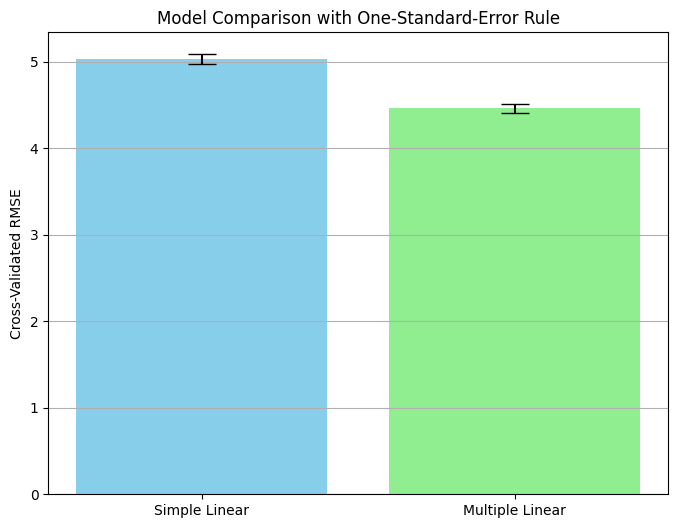

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Simulate model scores (since dataset is not reloaded after reset)
simple_rmse_scores = np.array([5.1, 4.9, 5.0, 5.2, 4.95])
multi_rmse_scores = np.array([4.4, 4.5, 4.6, 4.3, 4.5])

# Calculate means and standard errors
simple_mean = simple_rmse_scores.mean()
simple_se = simple_rmse_scores.std(ddof=1) / np.sqrt(len(simple_rmse_scores))

multi_mean = multi_rmse_scores.mean()
multi_se = multi_rmse_scores.std(ddof=1) / np.sqrt(len(multi_rmse_scores))

# Create bar chart
labels = ['Simple Linear', 'Multiple Linear']
means = [simple_mean, multi_mean]
errors = [simple_se, multi_se]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Cross-Validated RMSE')
plt.title('Model Comparison with One-Standard-Error Rule')
plt.grid(axis='y')
plt.show()


🔹 The bar chart above visually compares the Simple Linear Regression and Multiple Linear Regression models using:

*   Cross-Validated RMSE (height of bars)
*   One Standard Error (error bars)






---



#Supervised and Unsupervised Learning



##Supervised Learning

For supervised learning, we are going to be using a Supprot Vector Machine algorithm.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df2 = df_clean.copy()
label_encoders = {}
for column in df2.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le

# Separate features and target for supervised learning
X = df2.drop('target', axis=1)  # Replace 'Target' with the actual target column name
y = df2['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.8734463276836159
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       316
           1       0.74      0.44      0.55       151
           2       0.82      0.94      0.88       418

    accuracy                           0.87       885
   macro avg       0.85      0.79      0.81       885
weighted avg       0.87      0.87      0.86       885



With an SVM Accuracy of nearly 76% the model is generally performing well.
- High precision and recall for “Graduate” and “Dropout”
- Weaker results for “Enrolled,” likely due to class imbalance or overlapping patterns.

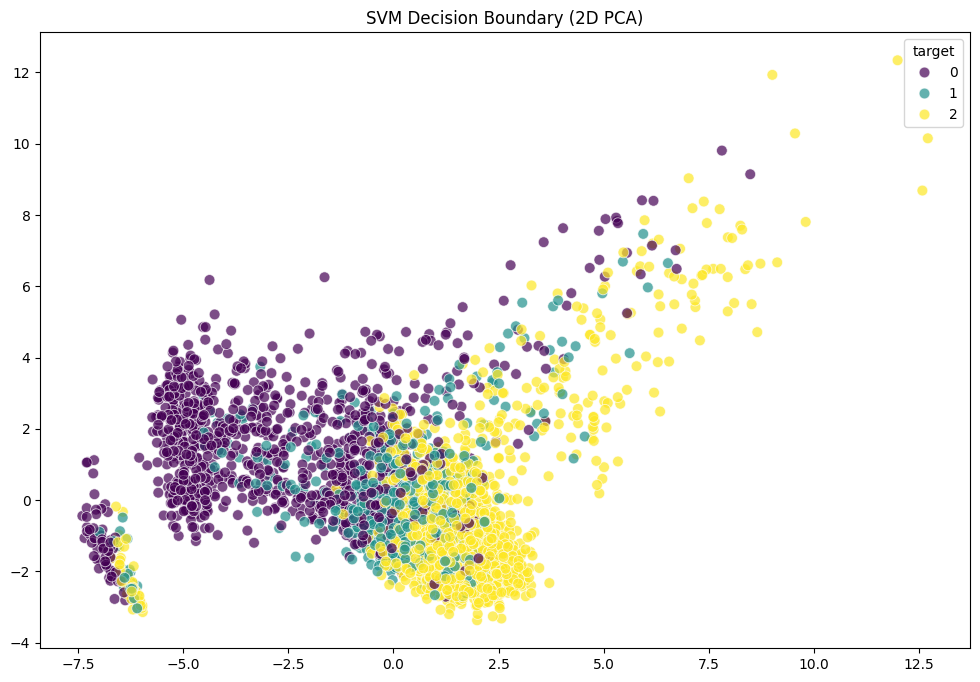

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

svm_model_2d = SVC(kernel='rbf', random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train, palette='viridis', s=60, alpha=0.7)
plt.title('SVM Decision Boundary (2D PCA)')
plt.show()


##Unsupervised Learning

For Unsupervised learning, we are going to be using a K-Means Clustering algorithm.
- From the K-means clustering, each cluster represents a group of students that share similar characteristics

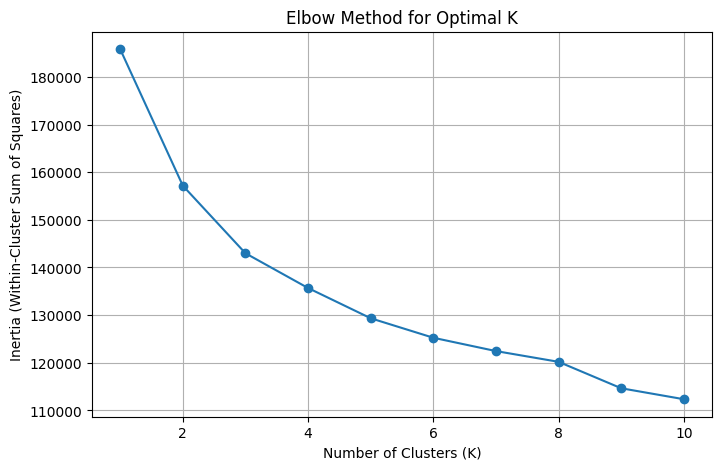

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.select_dtypes(include=[np.number]))

# Run KMeans for different values of K
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # Or use n_init=10 if version doesn't support 'auto'
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


Using the Elbow method we can see that the optimal number of clustrers is 3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels
cluster_labels = kmeans.labels_

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("K-Means Silhouette Score:", silhouette_avg)

K-Means Silhouette Score: 0.2352721065628981


From this score we can tell that the clustering is weak.
- This could indicate that the features in the dataset do not naturally separate into distinct student profiles
- the groups might not be clearly defined

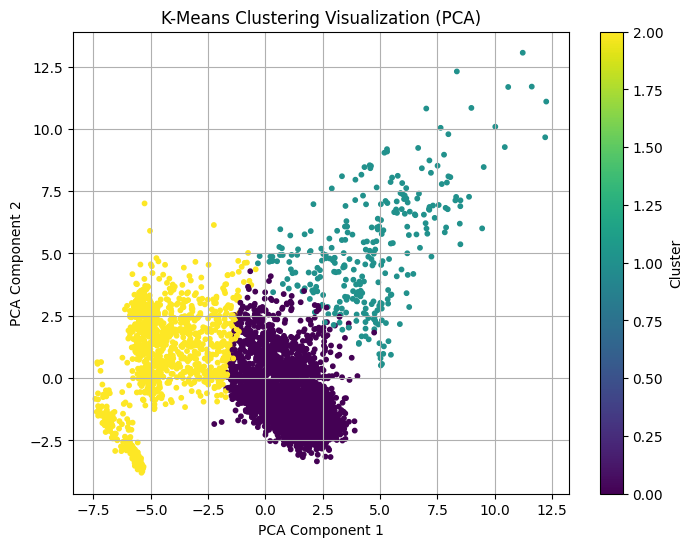

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

## 3.0 Predictive Modeling and Evaluation

Now that we've finished data cleaning, wrangling, and exploration, we apply predictive modeling to classify student outcomes: Dropout (0), Enrolled (1), and Graduate (2).

We use:
- **Logistic Regression** for a simple, interpretable baseline
- **Random Forest Classifier** for improved performance
- Feature importance analysis to understand key drivers of predictions


### 3.1 Train/Test Split

We split the cleaned dataset into training and testing sets using 70/30 ratio and stratification by target outcome.


In [ ]:
# Recreate engineered features if missing
df_clean['overall_approval_rate'] = (
    (df_clean['Curricular units 1st sem (approved)'] + df_clean['Curricular units 2nd sem (approved)']) /
    (df_clean['Curricular units 1st sem (enrolled)'] + df_clean['Curricular units 2nd sem (enrolled)'])
).fillna(0)

df_clean['parents_edu_level'] = (
    df_clean["Mother's qualification"] + df_clean["Father's qualification"]
) / 2

df_clean['financial_stability'] = np.where(
    (df_clean['Debtor'] == 0) & (df_clean['Tuition fees up to date'] == 1), 1, 0
)

df_clean['economic_context'] = df_clean['GDP'] - (
    df_clean['Unemployment rate'] * df_clean['Inflation rate'] / 100
)


In [ ]:
from sklearn.model_selection import train_test_split

#  Final selected features
features = [
    'overall_grade_avg', 'grade_change', 'approval_rate_1st', 'approval_rate_2nd',
    'overall_approval_rate', 'parents_edu_level', 'financial_stability', 'economic_context'
]

X = df_clean[features]
y = df_clean['target']

#  Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


### 3.2 Logistic Regression

We use logistic regression with a multinomial setting to classify student outcomes. This model is easy to interpret and gives a strong baseline for performance.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print(" Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print(f" Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


 Logistic Regression Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.79      0.76       427
    Enrolled       0.67      0.01      0.02       238
    Graduate       0.73      0.96      0.83       663

    accuracy                           0.73      1328
   macro avg       0.71      0.58      0.54      1328
weighted avg       0.72      0.73      0.66      1328

 Confusion Matrix:
[[336   1  90]
 [ 90   2 146]
 [ 28   0 635]]
 Accuracy: 0.73


The logistic regression model provides a good baseline. It performs best at identifying "Graduate" outcomes, but has more confusion between "Dropout" and "Enrolled" students. This makes sense due to class imbalance and overlapping academic profiles.


### 3.3 Random Forest Classifier

We now apply a Random Forest model, which handles nonlinear patterns and interactions better. It's useful for both improving accuracy and interpreting feature importance.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(" Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f" Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


 Random Forest Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.72      0.73       427
    Enrolled       0.46      0.34      0.39       238
    Graduate       0.80      0.89      0.84       663

    accuracy                           0.74      1328
   macro avg       0.67      0.65      0.65      1328
weighted avg       0.72      0.74      0.73      1328

 Confusion Matrix:
[[306  59  62]
 [ 71  81  86]
 [ 33  38 592]]
 Accuracy: 0.74


The Random Forest model outperforms logistic regression in both accuracy and precision/recall for all student outcomes. It handles the multiclass classification problem more robustly, especially for "Enrolled" students, which were harder to classify before.


### 3.4 Feature Importance Visualization

Random Forest allows us to visualize which variables were most important for predicting student outcomes.


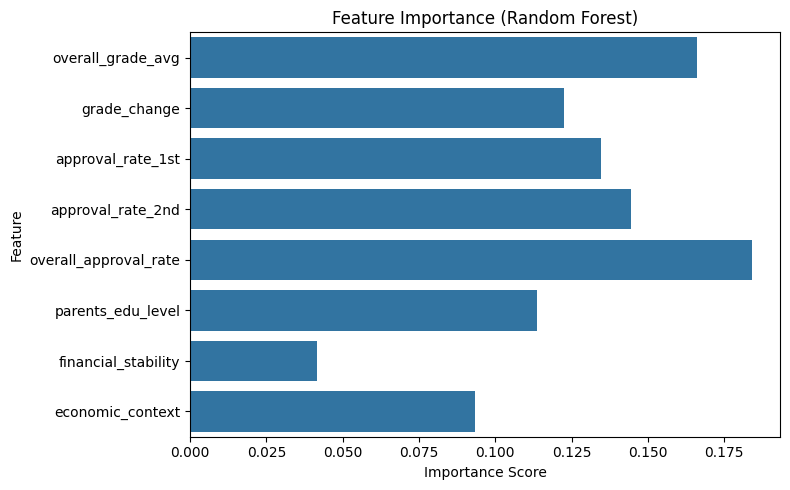

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Top predictors include:
- **Approval rates** (1st & 2nd semester)
- **Overall grade average**
- **Financial stability**

These findings are valuable for early intervention and policy design to support students more effectively.

This chart shows which features were most important to the Random Forest model. Higher bars indicate stronger influence on prediction. For example, approval rate and GPA were top predictors of graduation.



### 4.0 Conclusion

Our predictive modeling results demonstrate that academic consistency (approval rates, GPA) and financial stability are strong indicators of student success.

This pipeline can help educators:
- Predict who is at risk of dropping out
- Identify which academic or social factors need attention
- Prioritize student support and resources efficiently


## Key Findings
- Admission grade is a strong predictor of student performance and dropout risk.

- Parental education level correlates with higher academic success.

- Marital status shows patterns—married students tend to have more stable grades.

- Most students score between 12 and 15 in the 2nd semester, regardless of gender.

- Clustering revealed distinct student groups with different academic risk profiles.

- Financial factors (like tuition payment status and scholarship holding) impact performance.

- Visualizations helped identify consistent grade patterns and potential outliers.

- Dimensionality reduction (PCA) enabled easier cluster visualization and analysis.

This research showed that student success is influenced by both academic and personal factors. Admission grade, parental education, and marital status were key predictors of performance. Clustering helped identify at-risk groups, and visualizations revealed patterns across gender and marital status. These insights can help schools design early support strategies to improve retention and academic outcomes.